# Dados Disponíveis

- ID: Identificador único do pedido
- Delivery_person_ID: Código identificador do entregador
- Delivery_person_Age: Idade do entregador
- Delivery_person_Ratings: Rating do entregador no App
- Restaurant_latitude: Latitude do Restaurante
- Restaurant_longitude: Longitude do Restaurante
- Delivery_location_latitude: Latitude do Local de Entrega
- Delivery_location_longitude: Longitude do Local de Entrega
- Order_Date: Data do Pedido
- Time_Orderd: Hora da Compra
- Time_Order_picked: Hora em que o entregador pegou o pedido no restaurante
- Weatherconditions: Condições climáticas no momento da entrega
- Road_traffic_density: Status do trânsito no momento da entrega
- Vehicle_condition: Condição do veículo que fará a entrega
- Type_of_order: Tipo do pedido
- Type_of_vehicle: O tipo de Veículo que fará a entrega
- multiple_deliveries: Indica se o entregar possui múltiplas entregas na rota
- Festival: Indica se é dia de algum evento ou feriado.
- City: Indica se é área Urbana, Metropolitana ou outras
- Time_taken(min): Tempo em minutos para ser entregue o pedido

# Imports

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

from geopy.distance import geodesic
from IPython.core.display  import HTML
from matplotlib import pyplot as plt

# Funções

In [6]:

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Data Load

In [7]:
df = pd.read_csv('../data/data_delivery.csv')

In [8]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,(min) 30


# 1.0 Descrição dos Dados

In [9]:
df1 = df.copy()

## 1.1 Dimensão dos Dados

In [10]:
print('Quantidade de Linhas: {}'.format(df1.shape[0]))
print('Quantidade de Colunas: {}'.format(df1.shape[1]))

Quantidade de Linhas: 45593
Quantidade de Colunas: 20


## 1.2 Tipo dos Dados

In [11]:
df1.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object

## 1.3 Check Na

In [12]:
df1.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
dtype: int64

In [13]:
df1['Delivery_person_Age'] = df1['Delivery_person_Age'].astype(int)

In [14]:
df1.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
dtype: int64

## 1.4 Fill Na

In [15]:
from datetime import datetime

df1['Order_Date'] = pd.to_datetime(df1['Order_Date'])
df1['Time_Orderd'] = pd.to_datetime(df1['Time_Orderd'], errors='coerce').dt.time
df1['Time_Order_picked'] = pd.to_datetime(df1['Time_Order_picked'], errors='coerce').dt.time

df1['ordered_date_time'] = df1.apply(lambda row: datetime.combine(row['Order_Date'], row['Time_Orderd']) if pd.notnull(row['Time_Orderd']) else pd.NaT, axis=1)
df1['order_picked_date_time'] = df1.apply(lambda row: datetime.combine(row['Order_Date'], row['Time_Order_picked']) if pd.notnull(row['Time_Order_picked']) else pd.NaT, axis=1)

df1['time_diff'] = df1['ordered_date_time'] - df1['order_picked_date_time']

median_diff = df1['time_diff'].median()

df1['ordered_date_time'] = df1.apply(
    lambda row: row['order_picked_date_time'] + median_diff if pd.isnull(row['ordered_date_time']) else row['ordered_date_time'],
    axis=1
)

df1['Time_Orderd'] = df1['ordered_date_time']
df1['Time_Order_picked'] = df1['order_picked_date_time']

df1.drop(columns=['time_diff', 'ordered_date_time','order_picked_date_time'], inplace=True)


C:\Users\thale\AppData\Local\Temp\ipykernel_30088\3855502775.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Time_Orderd'] = pd.to_datetime(df1['Time_Orderd'], errors='coerce').dt.time
C:\Users\thale\AppData\Local\Temp\ipykernel_30088\3855502775.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Time_Order_picked'] = pd.to_datetime(df1['Time_Order_picked'], errors='coerce').dt.time


## 1.5 Change Data Types

In [16]:
def extrair_valor(texto):
    match = re.search(r'\d+', texto)
    if match:
        return int(match.group())
    else:
        return None

df1['Time_taken(min)'] = df1['Time_taken(min)'].apply(extrair_valor)

## 1.6 Estatística Descritiva

In [17]:
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(include=['object'])

### 1.6.1 Estatística Descritiva Numérica

In [18]:
#Medidas de Tendencia Central
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#Medidas de Dispersão
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenar
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [19]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,Delivery_person_Age,18.000000,50.000000,32.000000,29.424583,29.000000,5.733407,0.090328,-1.038405
1,Delivery_person_Ratings,1.000000,6.000000,5.000000,4.636552,4.700000,0.327902,-2.566185,16.508814
2,Restaurant_latitude,-30.905562,30.914057,61.819619,17.017729,18.546947,8.185019,-1.361583,3.713716
3,Restaurant_longitude,-88.366217,88.433452,176.799669,70.231332,75.898497,22.883396,-3.220159,10.303039
4,Delivery_location_latitude,0.010000,31.054057,31.044057,17.465186,18.633934,7.335042,-0.701066,0.264346
5,Delivery_location_longitude,0.010000,88.563452,88.553452,70.845702,76.002574,21.118580,-2.956385,7.104451
6,Vehicle_condition,0.000000,3.000000,3.000000,1.023359,1.000000,0.839056,0.071853,-1.315002
7,multiple_deliveries,0.000000,3.000000,3.000000,0.750225,1.000000,0.567424,0.298735,0.950328
8,Time_taken(min),10.000000,54.000000,44.000000,26.294607,26.000000,9.383703,0.485951,-0.310798


### 1.6.2 Estatística Descritiva Categórica

In [20]:
cat_attributes.describe().T

,count,unique,top,freq
ID,45593,45593,0x5fb2,1
Delivery_person_ID,45593,1320,JAPRES11DEL02,67
Weatherconditions,45593,6,conditions Cloudy,8152
Road_traffic_density,45593,4,Low,16078
Type_of_order,45593,4,Snack,11533
Type_of_vehicle,45593,4,motorcycle,26435
Festival,45593,2,No,44697
City,45593,3,Metropolitian,35293


# 2.0 Feature Engineering

In [21]:
df2 = df1.copy()

## 2.2 Mapa Mental de Hipóteses

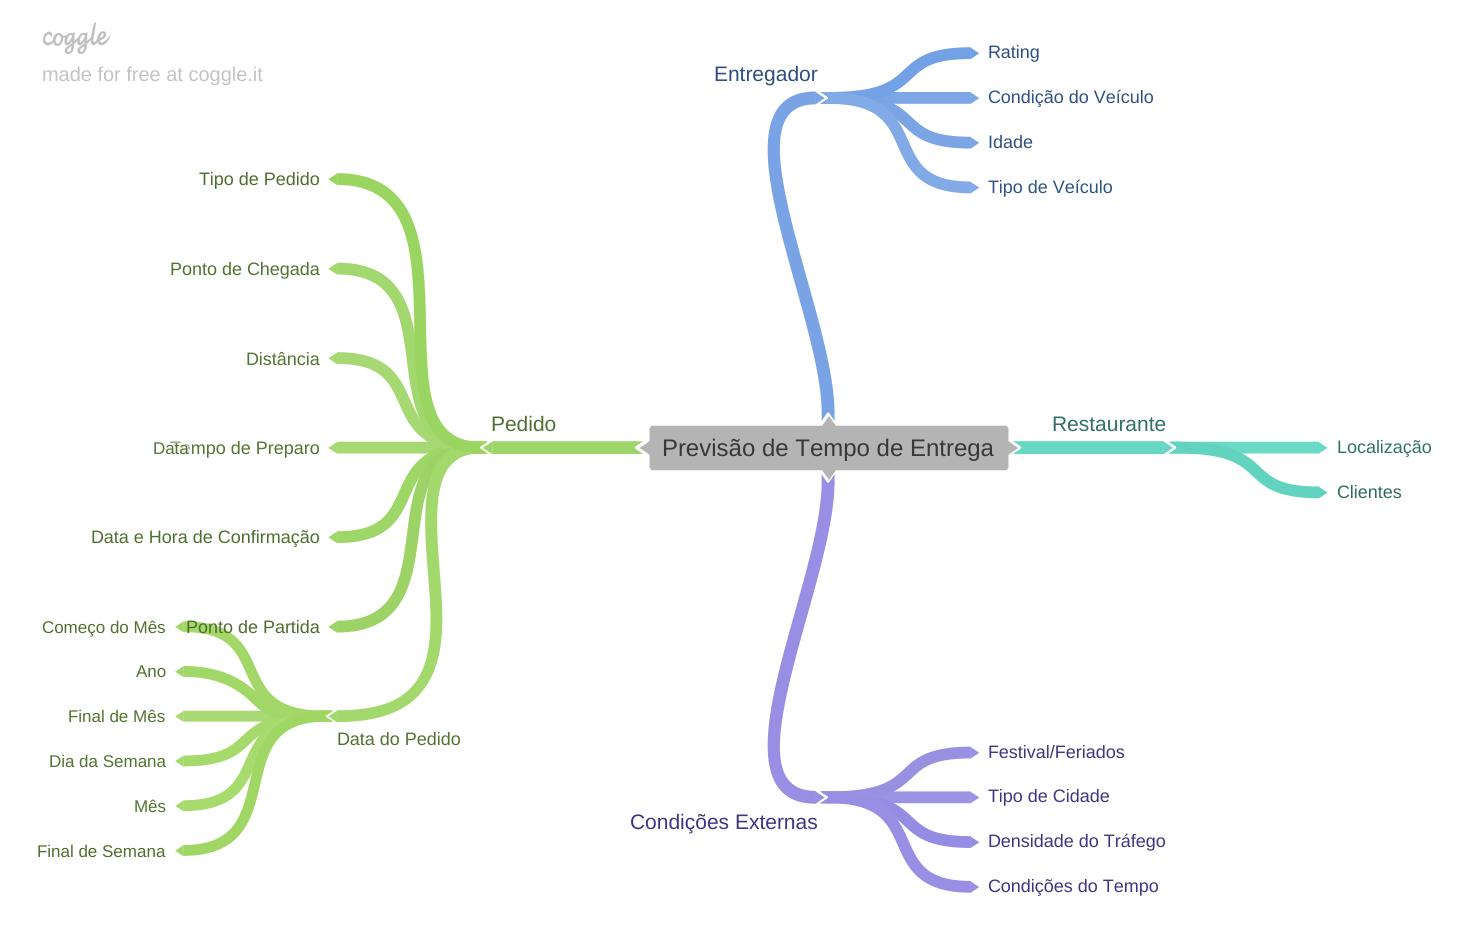

In [22]:
from IPython.display import Image
Image('../mind_map.png')

## 2.2 Lista de Hipóteses

### 2.2.1 Hipóteses do Pedido

- Quanto maior o tempo de preparo, maior o tempo de entrega

- Quanto maior a distância entre o restaurante e o cliente, maior o tempo de entrega

- Pedidos aos finais de semana possuem maior tempo de entrega

- Pedidos no começo do mês possuem maior tempo de entrega

- Tipos específicos de pedidos podem exigir diferentes tempos de entrega

### 2.2.2 Hipóteses do Entregador

- A idade do entregador afeta a velocidade da entrega

- Avaliações do entregador podem impactar a eficiência da entrega

- O tipo de veículo usado para entrega pode impactar no tempo de entrega

- Entregas múltiplas em uma rota podem aumentar o tempo de entrega 

- A condição do veículo pode influenciar no tempo de Entrega

### 2.2.3 Hipóteses de Condições Externas

- Condições climáticas adversas podem aumentar o tempo de entrega

- Densidade do tráfego pode impactar o tempo de entrega

- Festivais ou eventos na cidade podem afetar o tempo de entrega

## 2.3 Feature Engineering

In [23]:
df2['day'] = df2.Order_Date.dt.day
df2['month'] = df2.Order_Date.dt.month
df2['quarter'] = df2.Order_Date.dt.quarter
df2['year'] = df2.Order_Date.dt.year
df2['day_of_week'] = df2.Order_Date.dt.day_of_week.astype(int)
df2['is_month_start'] = df2.Order_Date.dt.is_month_start.astype(int)
df2['is_month_end'] = df2.Order_Date.dt.is_month_end.astype(int)
df2['is_quarter_start'] = df2.Order_Date.dt.is_quarter_start.astype(int)
df2['is_quarter_end'] = df2.Order_Date.dt.is_quarter_end.astype(int)
df2['is_year_start'] = df2.Order_Date.dt.is_year_start.astype(int)
df2['is_year_end'] = df2.Order_Date.dt.is_year_end.astype(int)
df2['is_weekend'] = np.where(df2['day_of_week'].isin([5,6]),1,0)



In [24]:
def calculate_time_diff(df):
    time_diff = df['Time_Order_picked'] - df['Time_Orderd']

    time_diff = time_diff.apply(lambda x: x + pd.Timedelta(days=1) if x.days < 0 else x)

    df['order_prepare_time'] = time_diff.dt.total_seconds() / 60

    df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)
calculate_time_diff(df2)

C:\Users\thale\AppData\Local\Temp\ipykernel_30088\1469552705.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)


In [25]:
def calculate_distance(df):
    df['distance'] = np.zeros(len(df))
    restaurante_coordinates = df[['Restaurant_latitude', 'Restaurant_longitude']].to_numpy()
    cliente_coordinates = df[['Delivery_location_latitude', 'Delivery_location_longitude']].to_numpy()
    df['distance'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(restaurante_coordinates, cliente_coordinates)])
    df['distance'] = df['distance'].astype('str').str.extract('(\d+)').astype('int64')
calculate_distance(df2)

In [26]:
df2.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2022-03-19 11:30:00,2022-03-19 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,3
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2022-03-25 19:45:00,2022-03-25 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,25,3,1,2022,4,0,0,0,0,0,0,0,5.0,20
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2022-03-19 08:30:00,2022-03-19 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,1
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2022-04-05 18:00:00,2022-04-05 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,5,4,2,2022,1,0,0,0,0,0,0,0,10.0,7
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2022-03-26 13:30:00,2022-03-26 13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,6


# 3.0 Filtragem de Dados

In [27]:
df3 = df2.copy()

## 3.1 Filtragem de Linhas

## 3.2 Filtragem de Colunas

In [28]:
df3 = df3.drop(columns=['ID', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Order_Date', 'Time_Orderd', 'Time_Order_picked'])

# 4.0 Análise Exploratória de Dados

In [87]:
df4 = df3.copy()

## 4.1 Análise Univariada

## 4.1.1 Variável Resposta

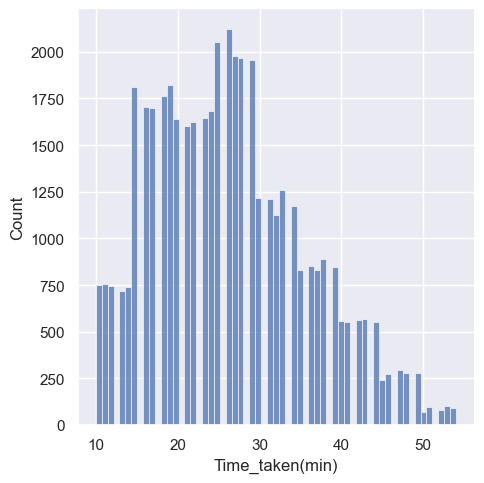

In [83]:
sns.displot(df4['Time_taken(min)'])

## 4.1.2 Variáveis Numéricas

In [84]:
num_attributes = df4.select_dtypes(include=['int64', 'float64', 'int32'])

In [85]:
num_attributes.hist(bins=25)

array([[<Axes: title={'center': 'Delivery_person_Age'}>,
        <Axes: title={'center': 'Delivery_person_Ratings'}>,
        <Axes: title={'center': 'Vehicle_condition'}>,
        <Axes: title={'center': 'multiple_deliveries'}>],
       [<Axes: title={'center': 'Time_taken(min)'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'quarter'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'day_of_week'}>,
        <Axes: title={'center': 'is_month_start'}>,
        <Axes: title={'center': 'is_month_end'}>],
       [<Axes: title={'center': 'is_quarter_start'}>,
        <Axes: title={'center': 'is_quarter_end'}>,
        <Axes: title={'center': 'is_year_start'}>,
        <Axes: title={'center': 'is_year_end'}>],
       [<Axes: title={'center': 'is_weekend'}>,
        <Axes: title={'center': 'order_prepare_time'}>,
        <Axes: title={'center': 'distance'}>, <Axes: >]], dtype=object)

Error in callback <function flush_figures at 0x00000213EFB92E80> (for post_execute), with arguments args (),kwargs {}:


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000213DC608CD0>>
Traceback (most recent call last):
  File "c:\Users\thale\Documents\pi2\env\Lib\site-packages\ipykernel\ipkernel.py", line 790, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\thale\Documents\pi2\env\Lib\site-packages\ipykernel\ipkernel.py", line 790, in <setcomp>
    active_threads = {thread.ident for thread in threading.enumerate()}

KeyboardInterrupt: 


KeyboardInterrupt: 

### 4.1.3 Variáveis Categóricas

In [ ]:
df4.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,INDORES13DEL02,37,4.9,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,3
1,BANGRES18DEL02,34,4.5,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,25,3,1,2022,4,0,0,0,0,0,0,0,5.0,20
2,BANGRES19DEL01,23,4.4,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,1
3,COIMBRES13DEL02,38,4.7,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,5,4,2,2022,1,0,0,0,0,0,0,0,10.0,7
4,CHENRES12DEL01,32,4.6,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,6


C:\Users\thale\AppData\Local\Temp\ipykernel_30088\2004267524.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df4[df4['Weatherconditions'] == 'conditions Windy']['Time_taken(min)'], label='conditions Windy', shade=True)
C:\Users\thale\AppData\Local\Temp\ipykernel_30088\2004267524.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df4[df4['Weatherconditions'] == 'conditions Fog']['Time_taken(min)'], label='conditions Fog', shade=True )
C:\Users\thale\AppData\Local\Temp\ipykernel_30088\2004267524.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df4[df4['Weatherconditions'] == 'conditions Stormy']['Time_taken(m

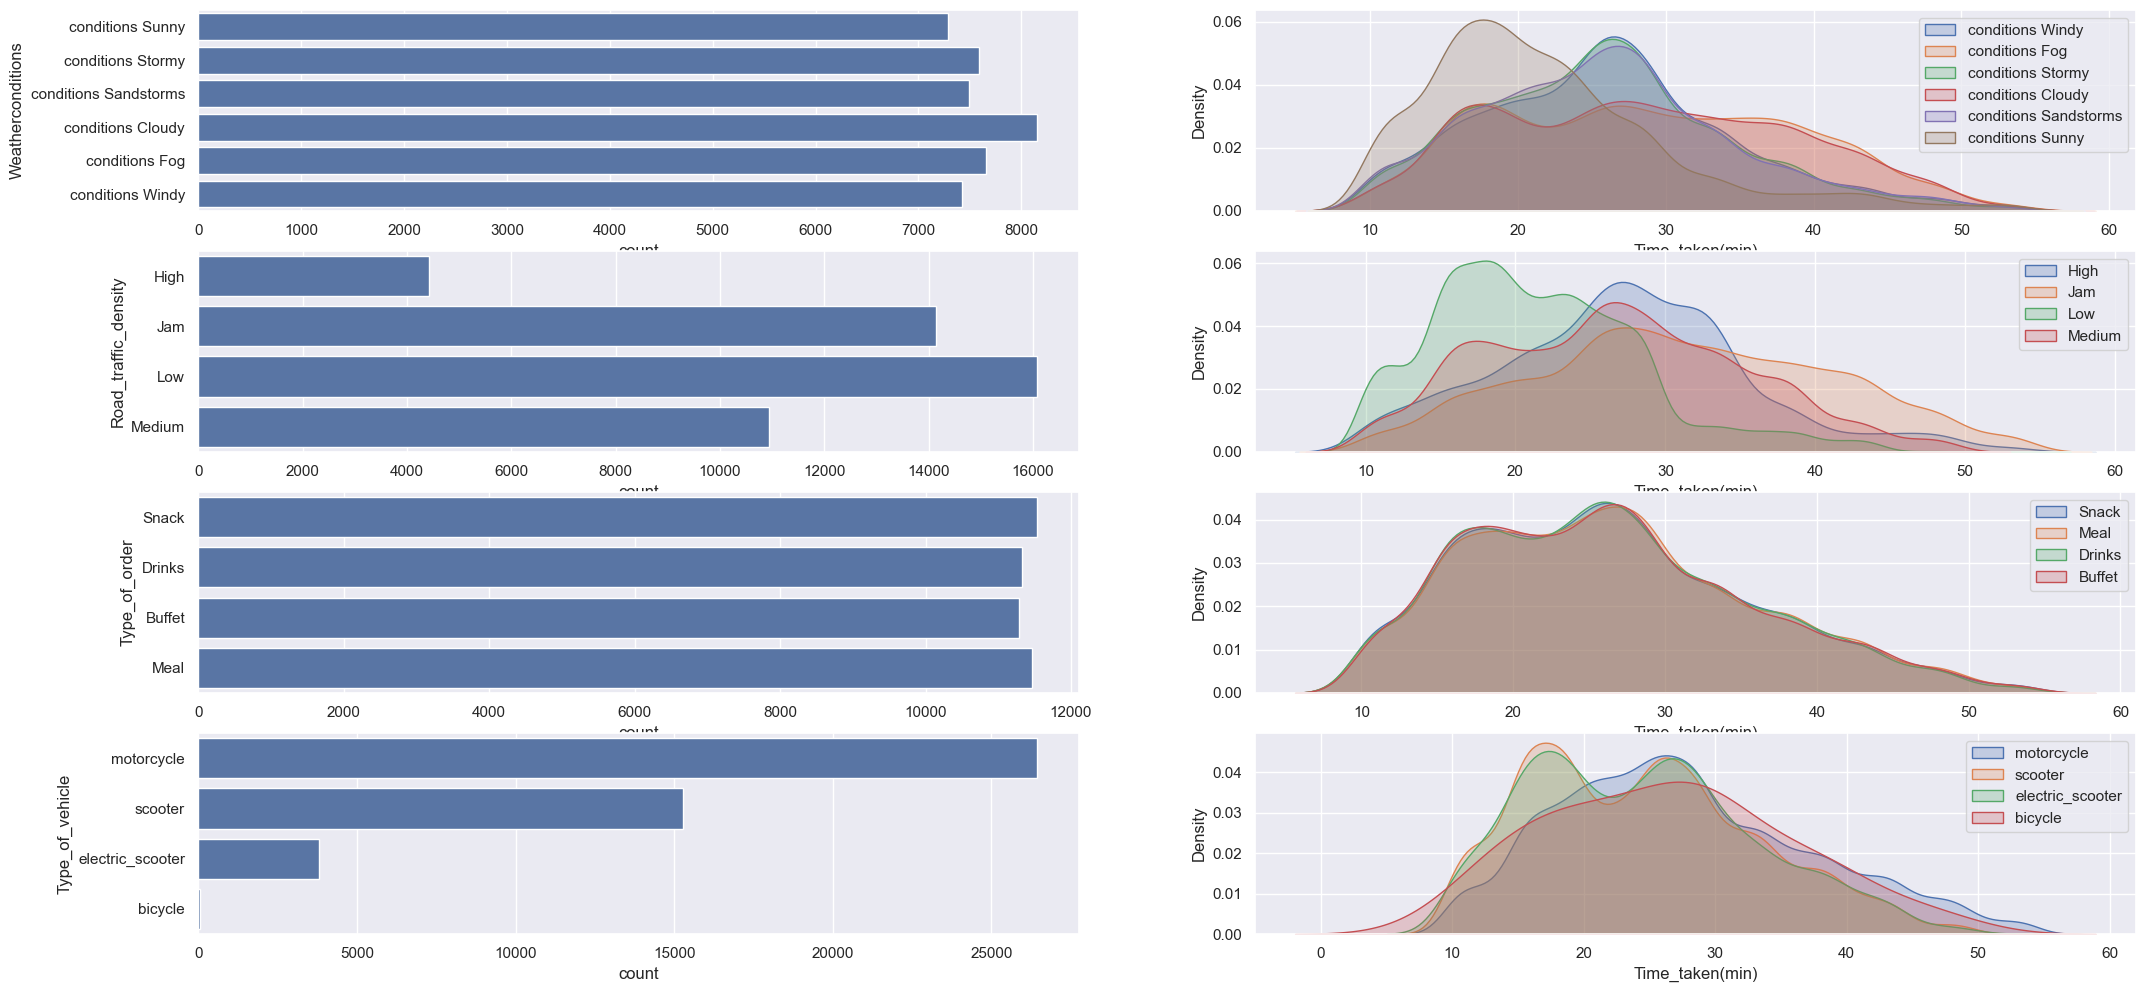

In [ ]:
df4['Road_traffic_density'] = df4['Road_traffic_density'].str.strip()
df4['Type_of_order'] = df4['Type_of_order'].str.strip()
df4['Type_of_vehicle'] = df4['Type_of_vehicle'].str.strip()


# weatherconditions
plt.subplot( 4, 2, 1 )
sns.countplot(df4['Weatherconditions'])


plt.subplot( 4, 2, 2 )
sns.kdeplot( df4[df4['Weatherconditions'] == 'conditions Windy']['Time_taken(min)'], label='conditions Windy', shade=True)
sns.kdeplot( df4[df4['Weatherconditions'] == 'conditions Fog']['Time_taken(min)'], label='conditions Fog', shade=True )
sns.kdeplot( df4[df4['Weatherconditions'] == 'conditions Stormy']['Time_taken(min)'], label='conditions Stormy', shade=True )
sns.kdeplot( df4[df4['Weatherconditions'] == 'conditions Cloudy']['Time_taken(min)'], label='conditions Cloudy', shade=True )
sns.kdeplot( df4[df4['Weatherconditions'] == 'conditions Sandstorms']['Time_taken(min)'], label='conditions Sandstorms', shade=True )
sns.kdeplot( df4[df4['Weatherconditions'] == 'conditions Sunny']['Time_taken(min)'], label='conditions Sunny', shade=True )
plt.legend()


# road_traffic_density
plt.subplot( 4, 2, 3 )
sns.countplot(df4['Road_traffic_density'])


plt.subplot( 4, 2, 4 )
sns.kdeplot( df4[df4['Road_traffic_density'] == 'High']['Time_taken(min)'], label='High', shade=True)
sns.kdeplot( df4[df4['Road_traffic_density'] == 'Jam']['Time_taken(min)'], label='Jam', shade=True )
sns.kdeplot( df4[df4['Road_traffic_density'] == 'Low']['Time_taken(min)'], label='Low', shade=True )
sns.kdeplot( df4[df4['Road_traffic_density'] == 'Medium']['Time_taken(min)'], label='Medium', shade=True )
plt.legend()


# type_of_order
plt.subplot( 4, 2, 5 )
sns.countplot(df4['Type_of_order'])

plt.subplot( 4, 2, 6 )
sns.kdeplot( df4[df4['Type_of_order'] == 'Snack']['Time_taken(min)'], label='Snack', shade=True)
sns.kdeplot( df4[df4['Type_of_order'] == 'Meal']['Time_taken(min)'], label='Meal', shade=True )
sns.kdeplot( df4[df4['Type_of_order'] == 'Drinks']['Time_taken(min)'], label='Drinks', shade=True )
sns.kdeplot( df4[df4['Type_of_order'] == 'Buffet']['Time_taken(min)'], label='Buffet', shade=True )
plt.legend()


# type_of_vehicle
plt.subplot( 4, 2, 7 )
sns.countplot(df4['Type_of_vehicle'])

plt.subplot( 4, 2, 8 )
sns.kdeplot( df4[df4['Type_of_vehicle'] == 'motorcycle']['Time_taken(min)'], label='motorcycle', shade=True)
sns.kdeplot( df4[df4['Type_of_vehicle'] == 'scooter']['Time_taken(min)'], label='scooter', shade=True )
sns.kdeplot( df4[df4['Type_of_vehicle'] == 'electric_scooter']['Time_taken(min)'], label='electric_scooter', shade=True )
sns.kdeplot( df4[df4['Type_of_vehicle'] == 'bicycle']['Time_taken(min)'], label='bicycle', shade=True )
plt.legend()

## 4.2 Análsie Bivariada

<Axes: >

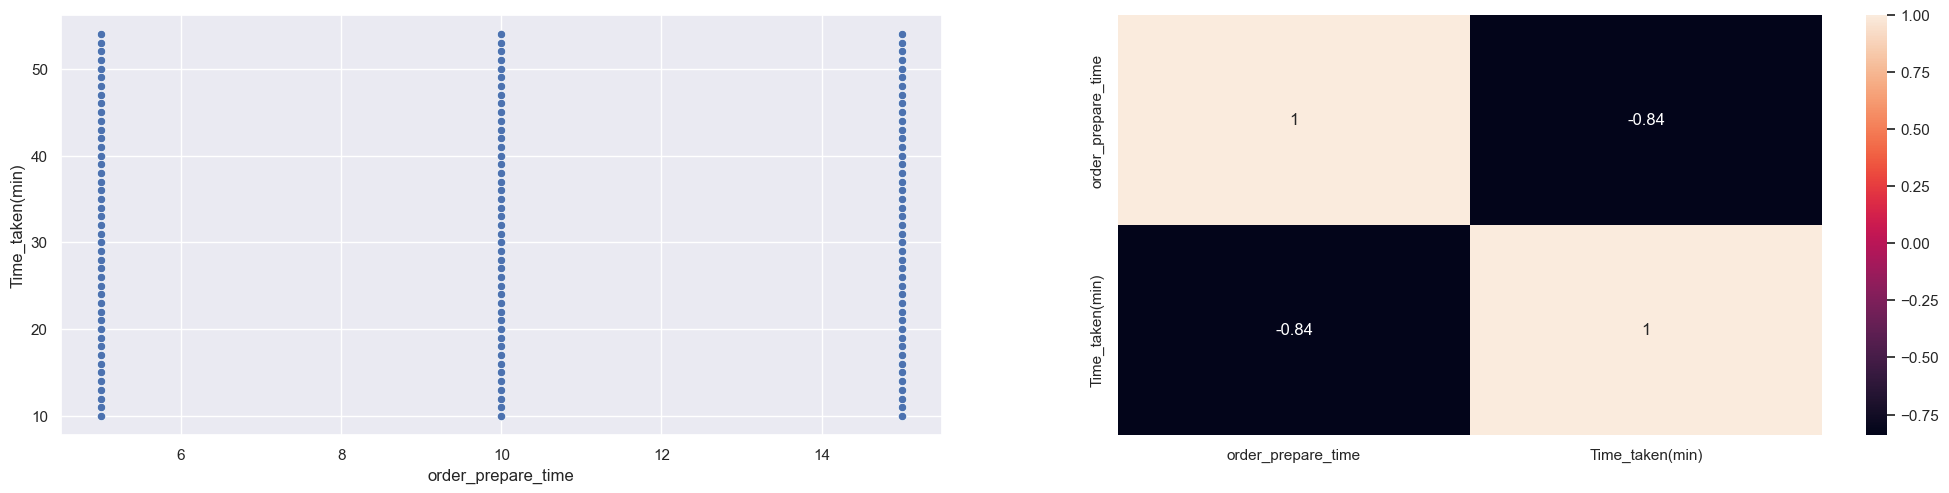

In [ ]:
# Quanto maior o tempo de preparo, maior o tempo de entrega
aux1 = df4[['order_prepare_time','Time_taken(min)']].groupby('order_prepare_time').mean().reset_index()

grid = GridSpec(2,2)

plt.subplot(grid[0,0])
sns.scatterplot(x='order_prepare_time', y='Time_taken(min)', data=df4)

plt.subplot(grid[0,1])
sns.heatmap(aux1.corr(method='pearson'), annot=True)


<Axes: >

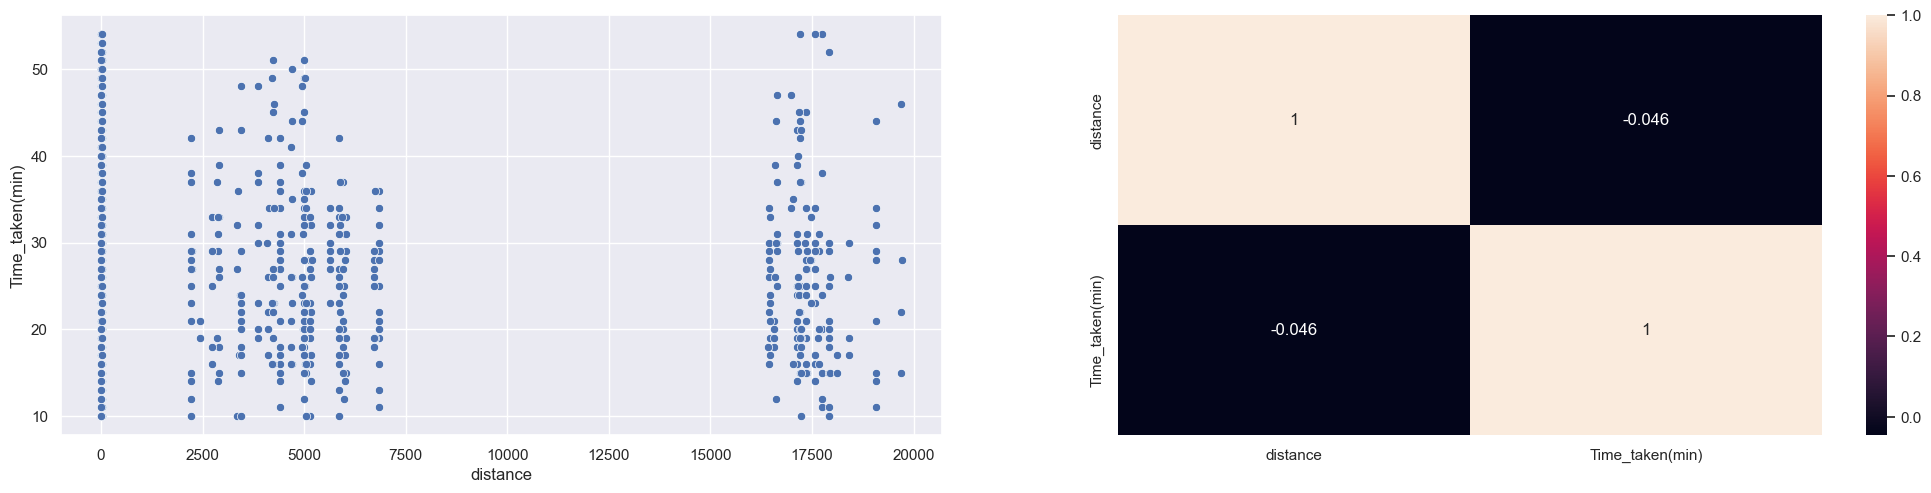

In [ ]:
# - Quanto maior a distância entre o restaurante e o cliente, maior o tempo de entrega
aux1 = df4[['distance','Time_taken(min)']].groupby('distance').mean().reset_index()

grid = GridSpec(2,2)

plt.subplot(grid[0,0])
sns.scatterplot(x='distance', y='Time_taken(min)', data=df4)

plt.subplot(grid[0,1])
sns.heatmap(aux1.corr(method='pearson'), annot=True)

<Axes: xlabel='is_weekend', ylabel='Time_taken(min)'>

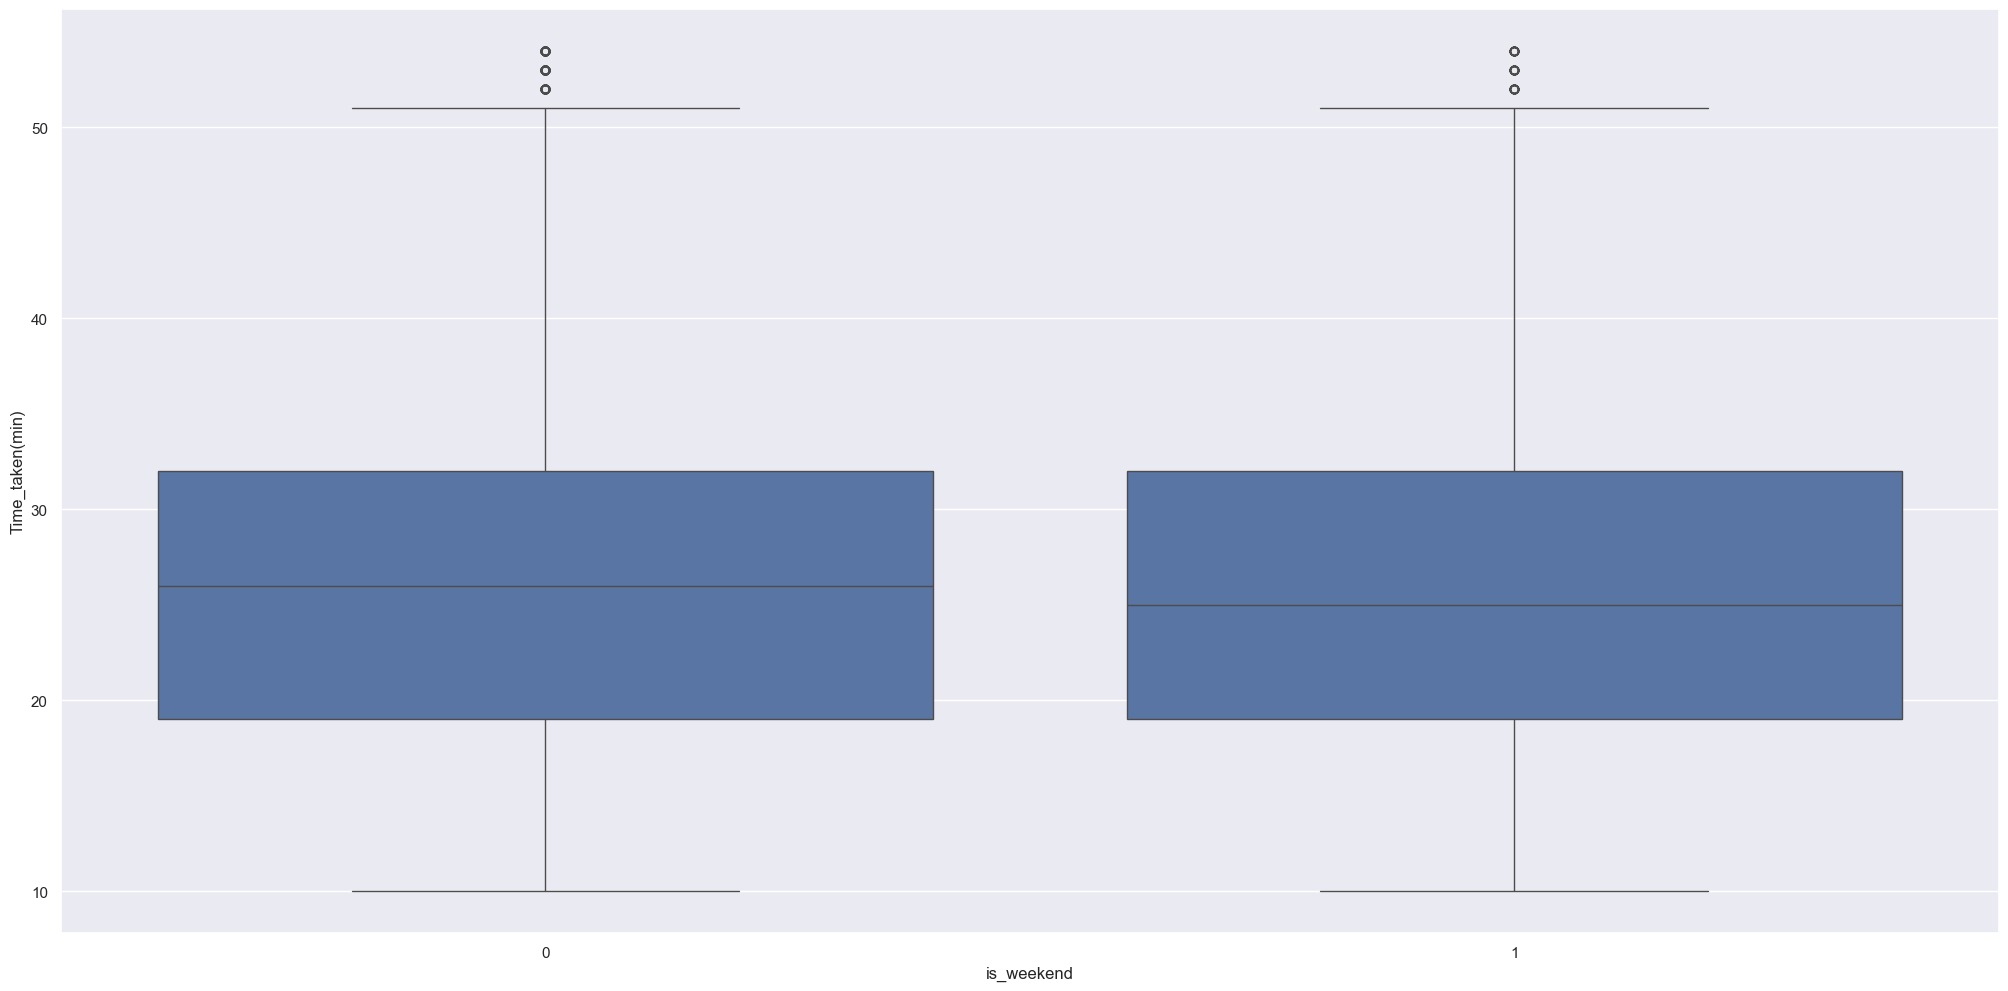

In [ ]:
# Pedidos aos finais de semana possuem maior tempo de entrega
sns.boxplot(x='is_weekend', y='Time_taken(min)', data=df4)

<Axes: xlabel='is_month_start', ylabel='Time_taken(min)'>

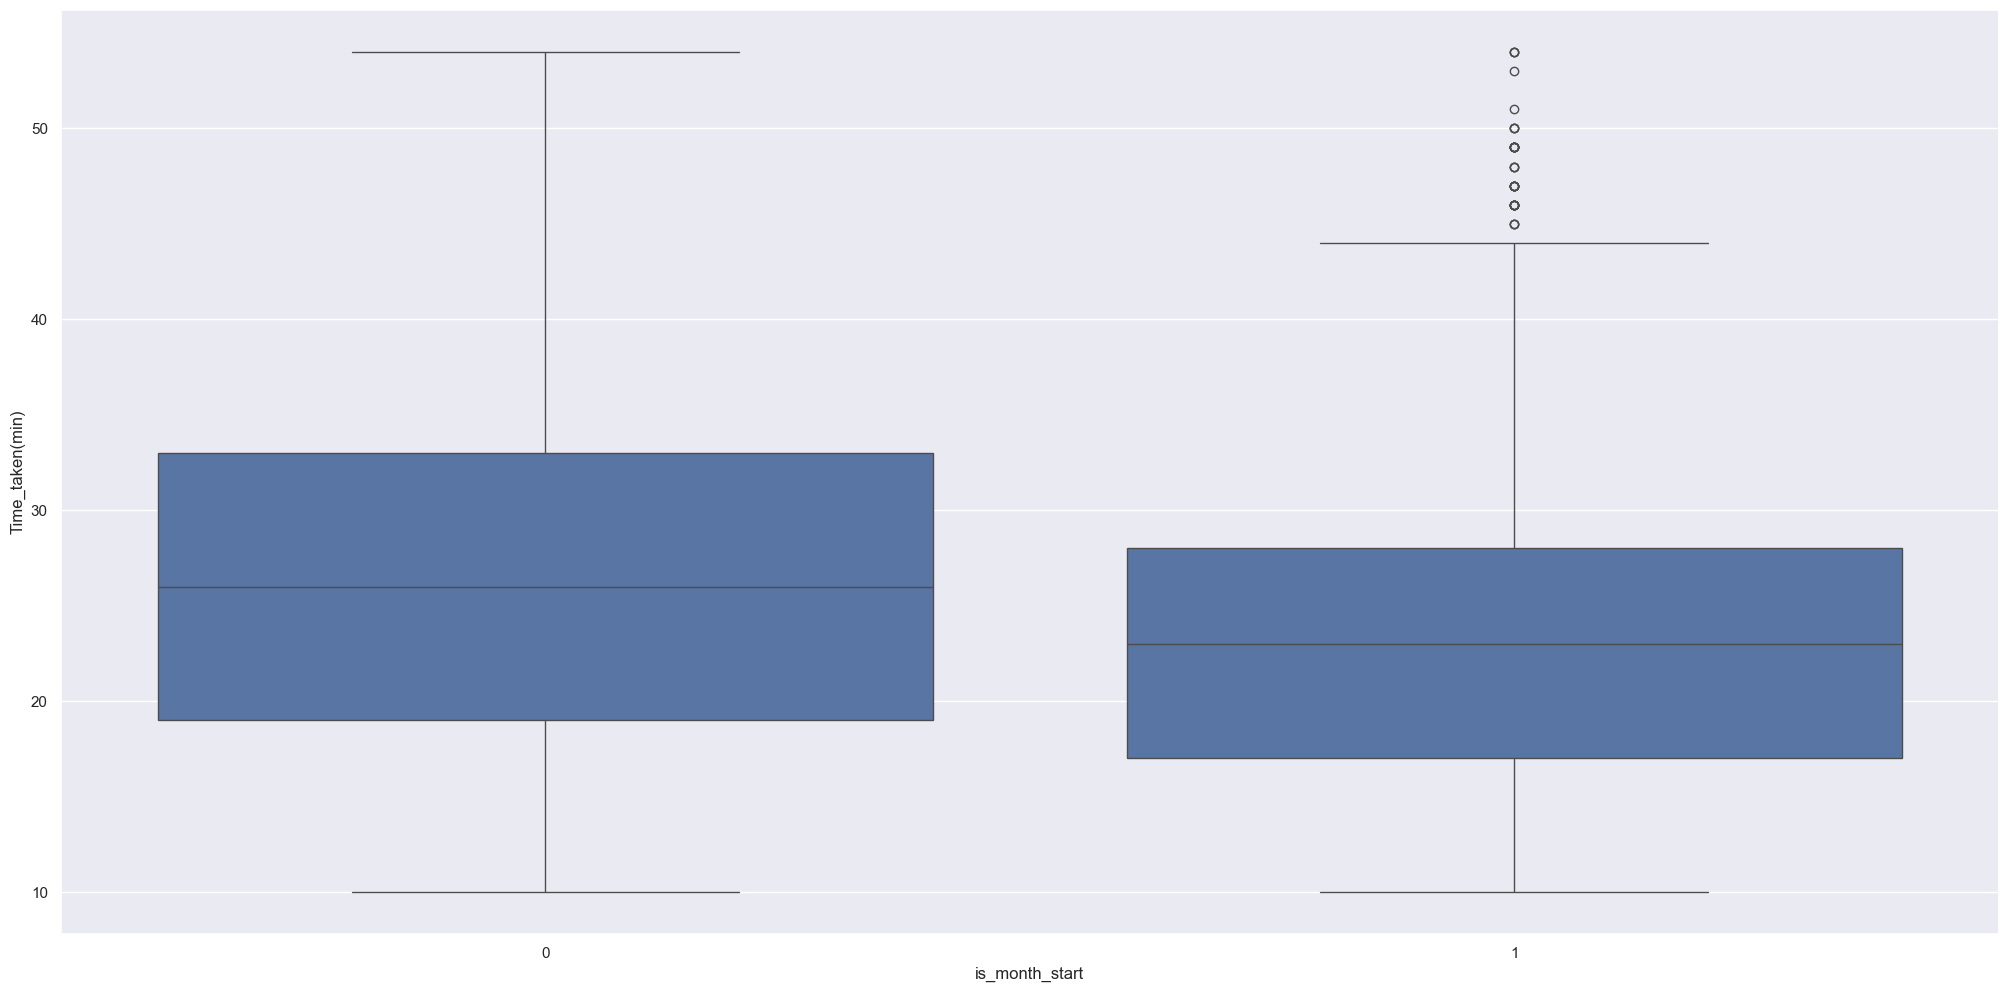

In [ ]:
# Pedidos no começo do mês possuem maior tempo de entrega
sns.boxplot(x='is_month_start', y='Time_taken(min)', data=df4)

<Axes: xlabel='Type_of_order', ylabel='Time_taken(min)'>

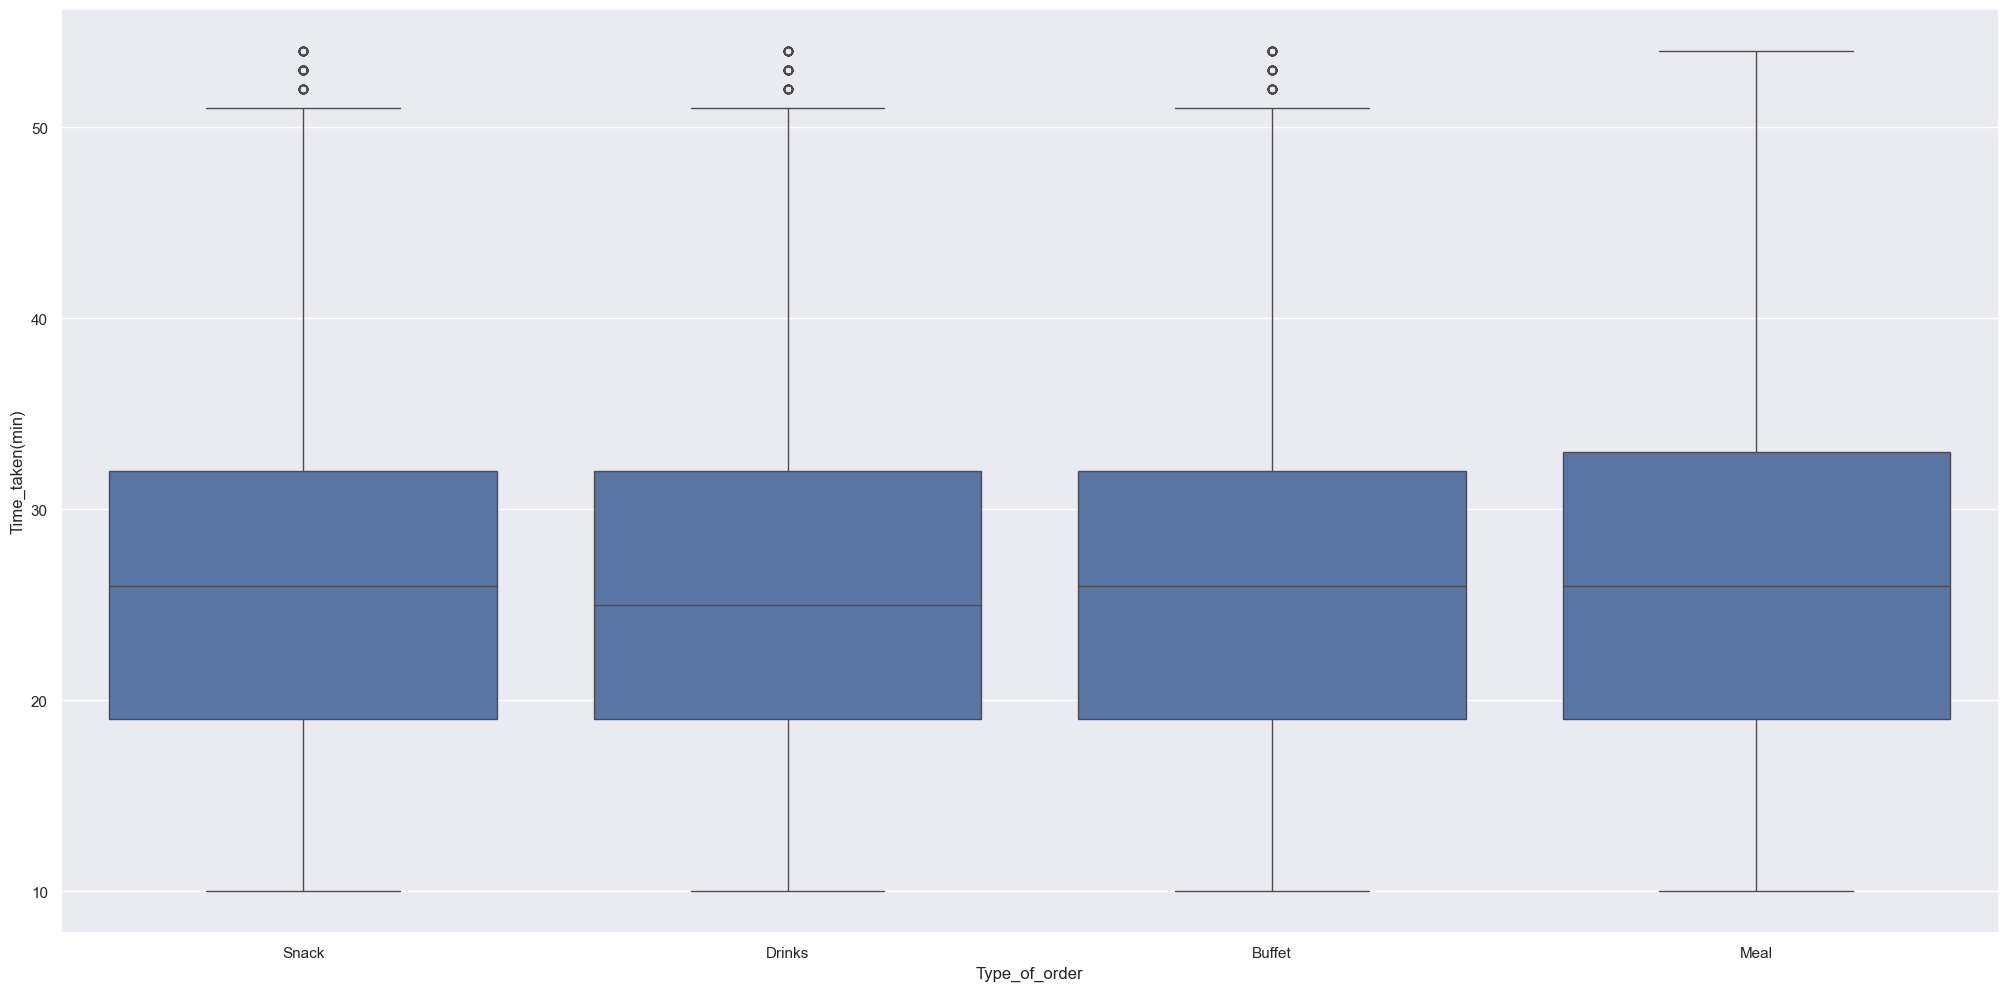

In [ ]:
# Tipos específicos de pedidos podem exigir diferentes tempos de entrega
sns.boxplot(x='Type_of_order', y='Time_taken(min)', data=df4)

<Axes: >

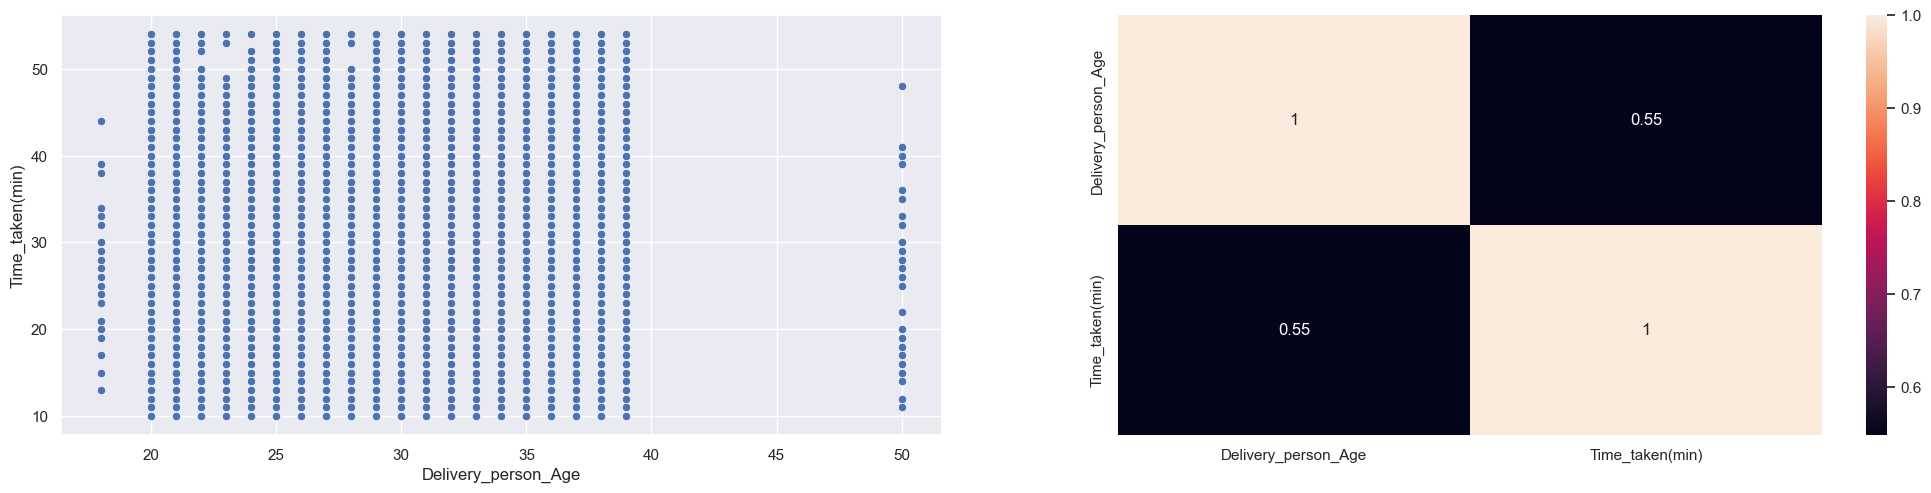

In [ ]:
## A idade do entregador afeta a velocidade da entrega
aux1 = df4[['Delivery_person_Age', 'Time_taken(min)']].groupby('Delivery_person_Age').mean().reset_index()

grid = GridSpec(2,2)

plt.subplot(grid[0,0])
sns.scatterplot(x='Delivery_person_Age', y='Time_taken(min)', data=df4)

plt.subplot(grid[0,1])
sns.heatmap(aux1.corr(method='pearson'), annot=True)

<Axes: xlabel='Delivery_person_Ratings', ylabel='Time_taken(min)'>

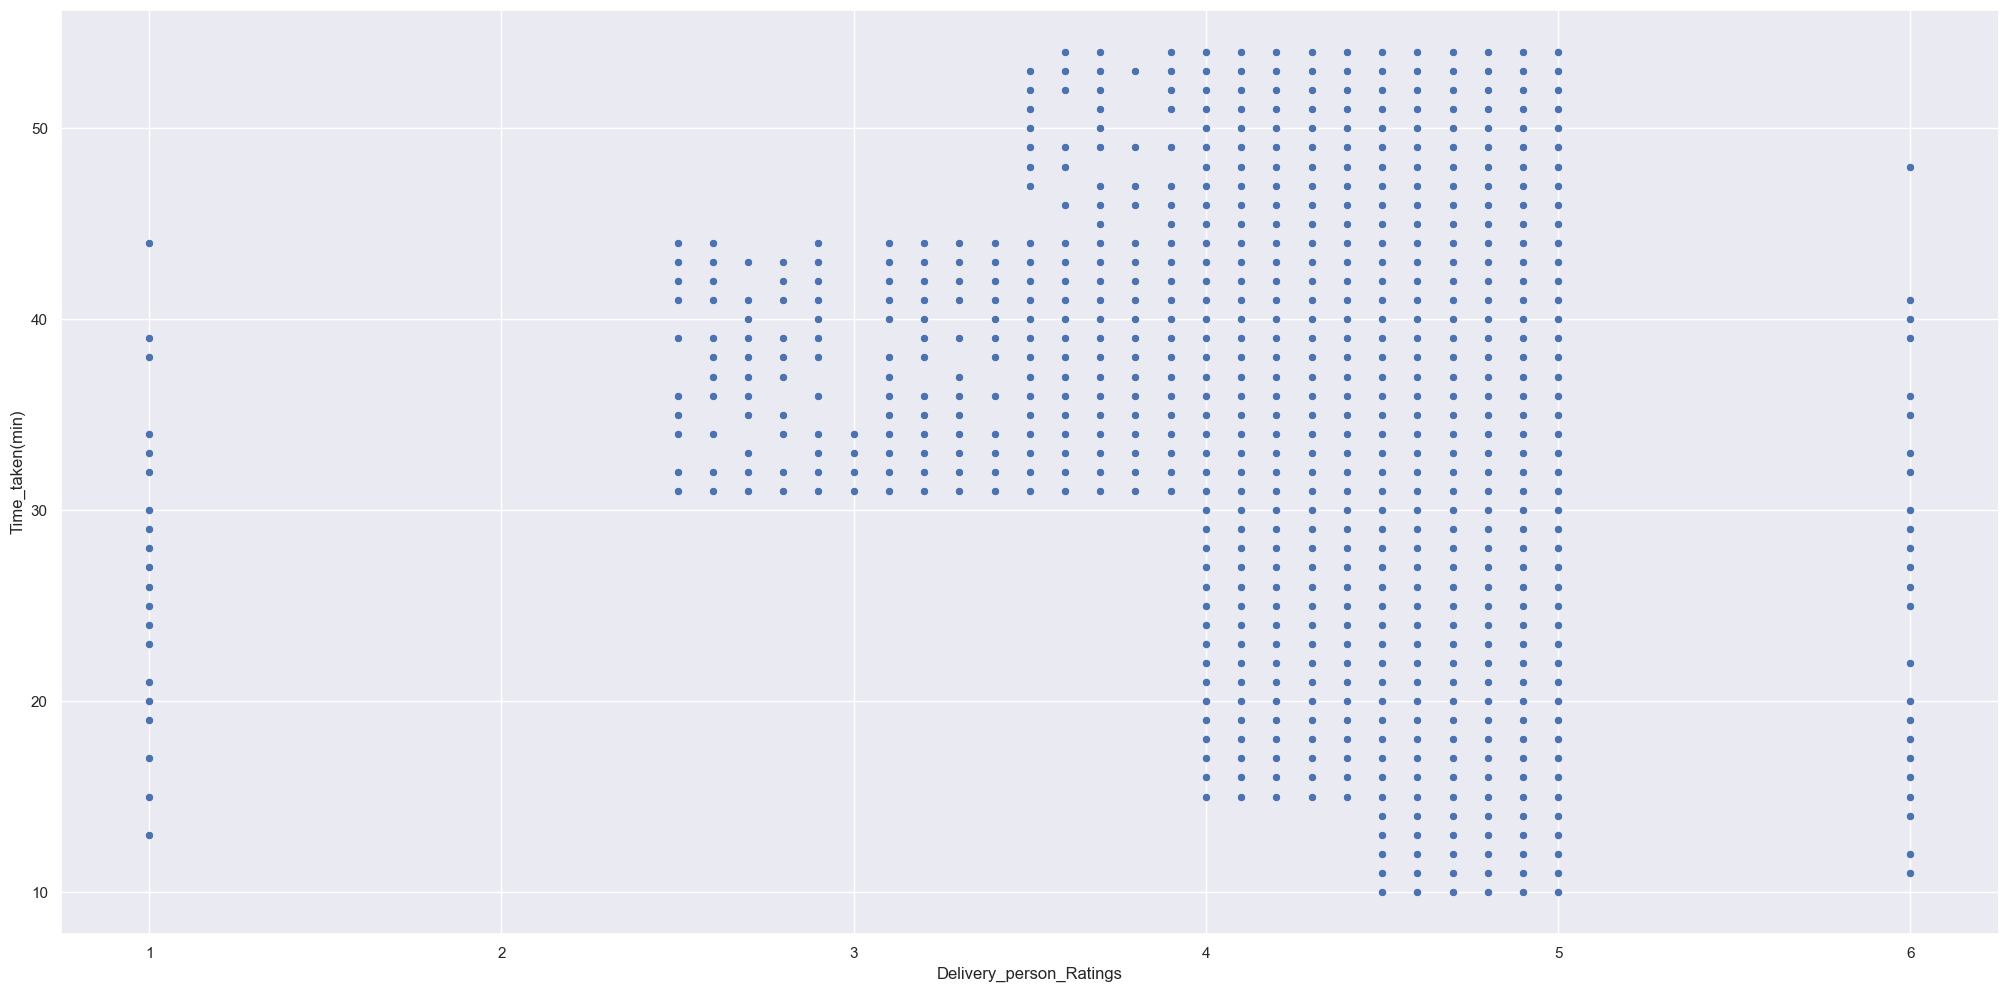

In [ ]:
## Avaliações do entregador podem impactar a eficiência da entrega
sns.scatterplot(x='Delivery_person_Ratings', y='Time_taken(min)', data=df4)

<Axes: xlabel='Type_of_vehicle', ylabel='Time_taken(min)'>

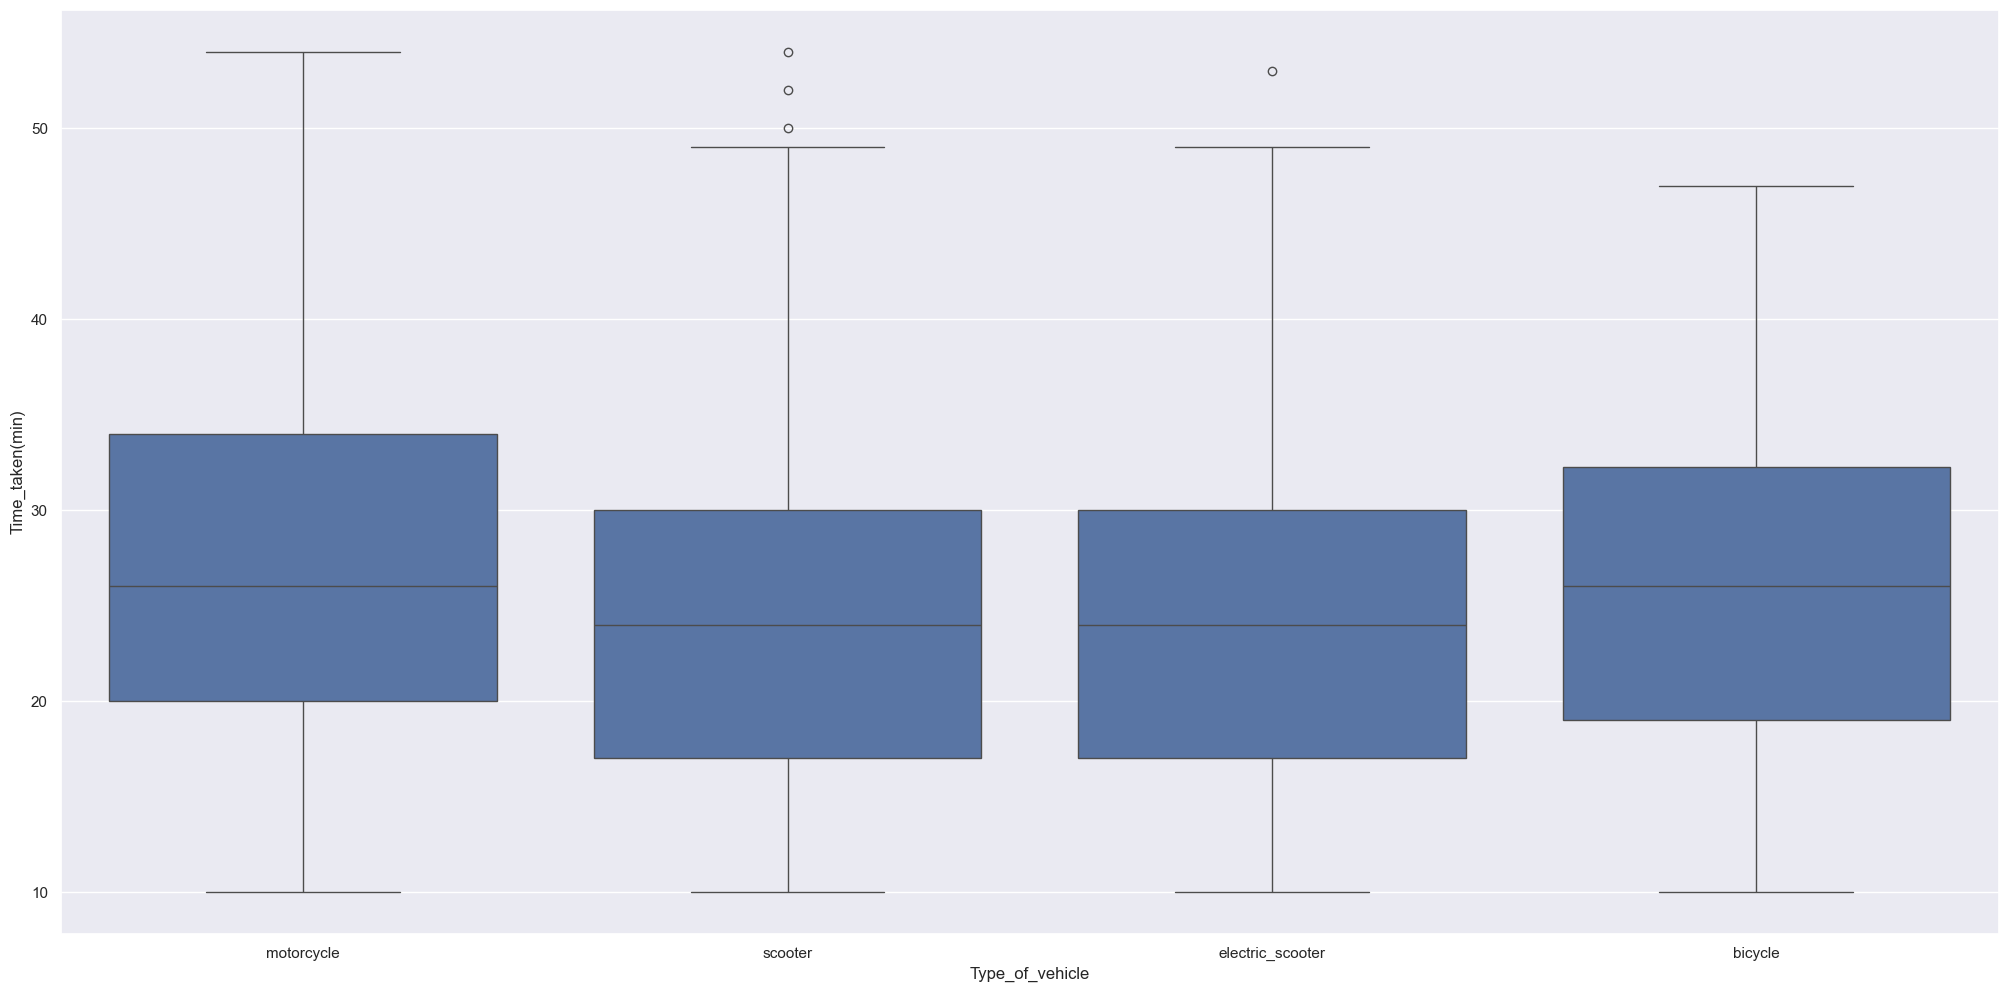

In [ ]:
## O tipo de veículo usado para entrega pode impactar no tempo de entrega
sns.boxplot(x='Type_of_vehicle', y='Time_taken(min)', data=df4)

<Axes: xlabel='multiple_deliveries', ylabel='Time_taken(min)'>

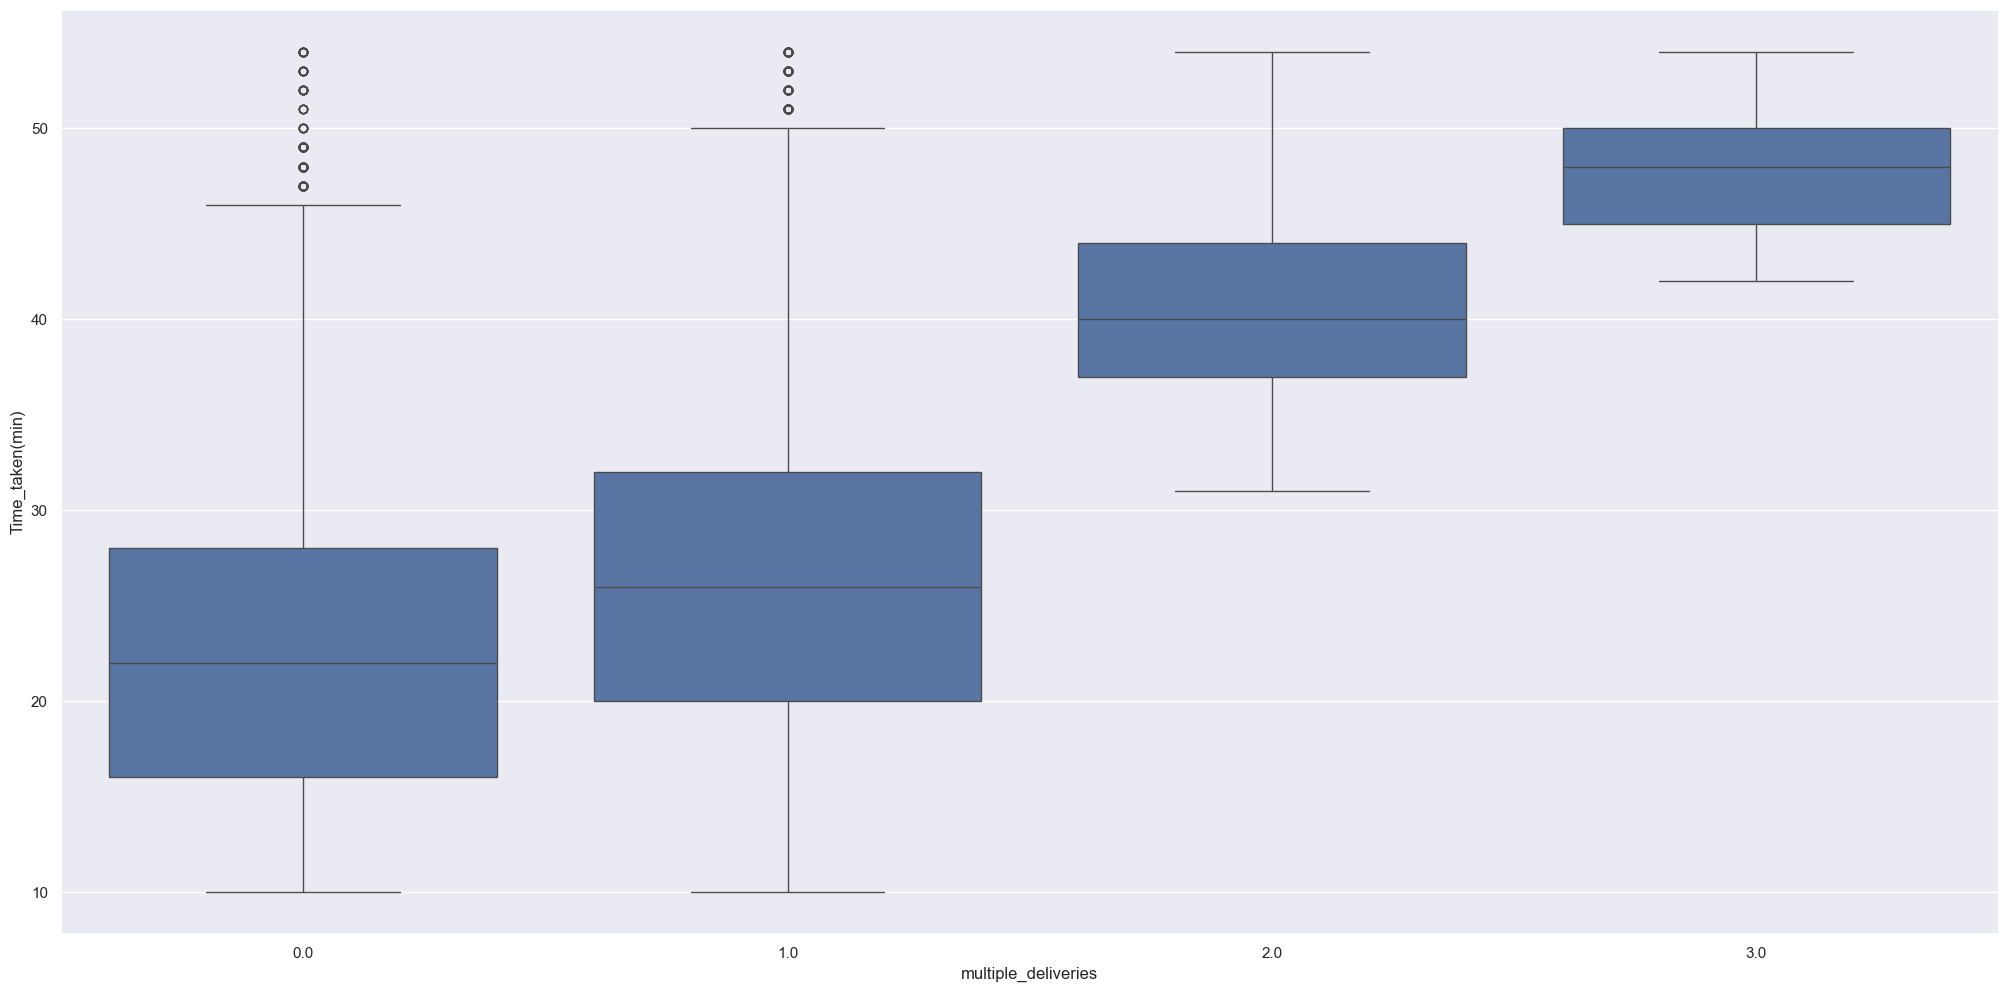

In [ ]:
## Entregas múltiplas em uma rota podem aumentar o tempo de entrega
sns.boxplot(x='multiple_deliveries', y='Time_taken(min)', data=df4)

<Axes: xlabel='Vehicle_condition', ylabel='Time_taken(min)'>

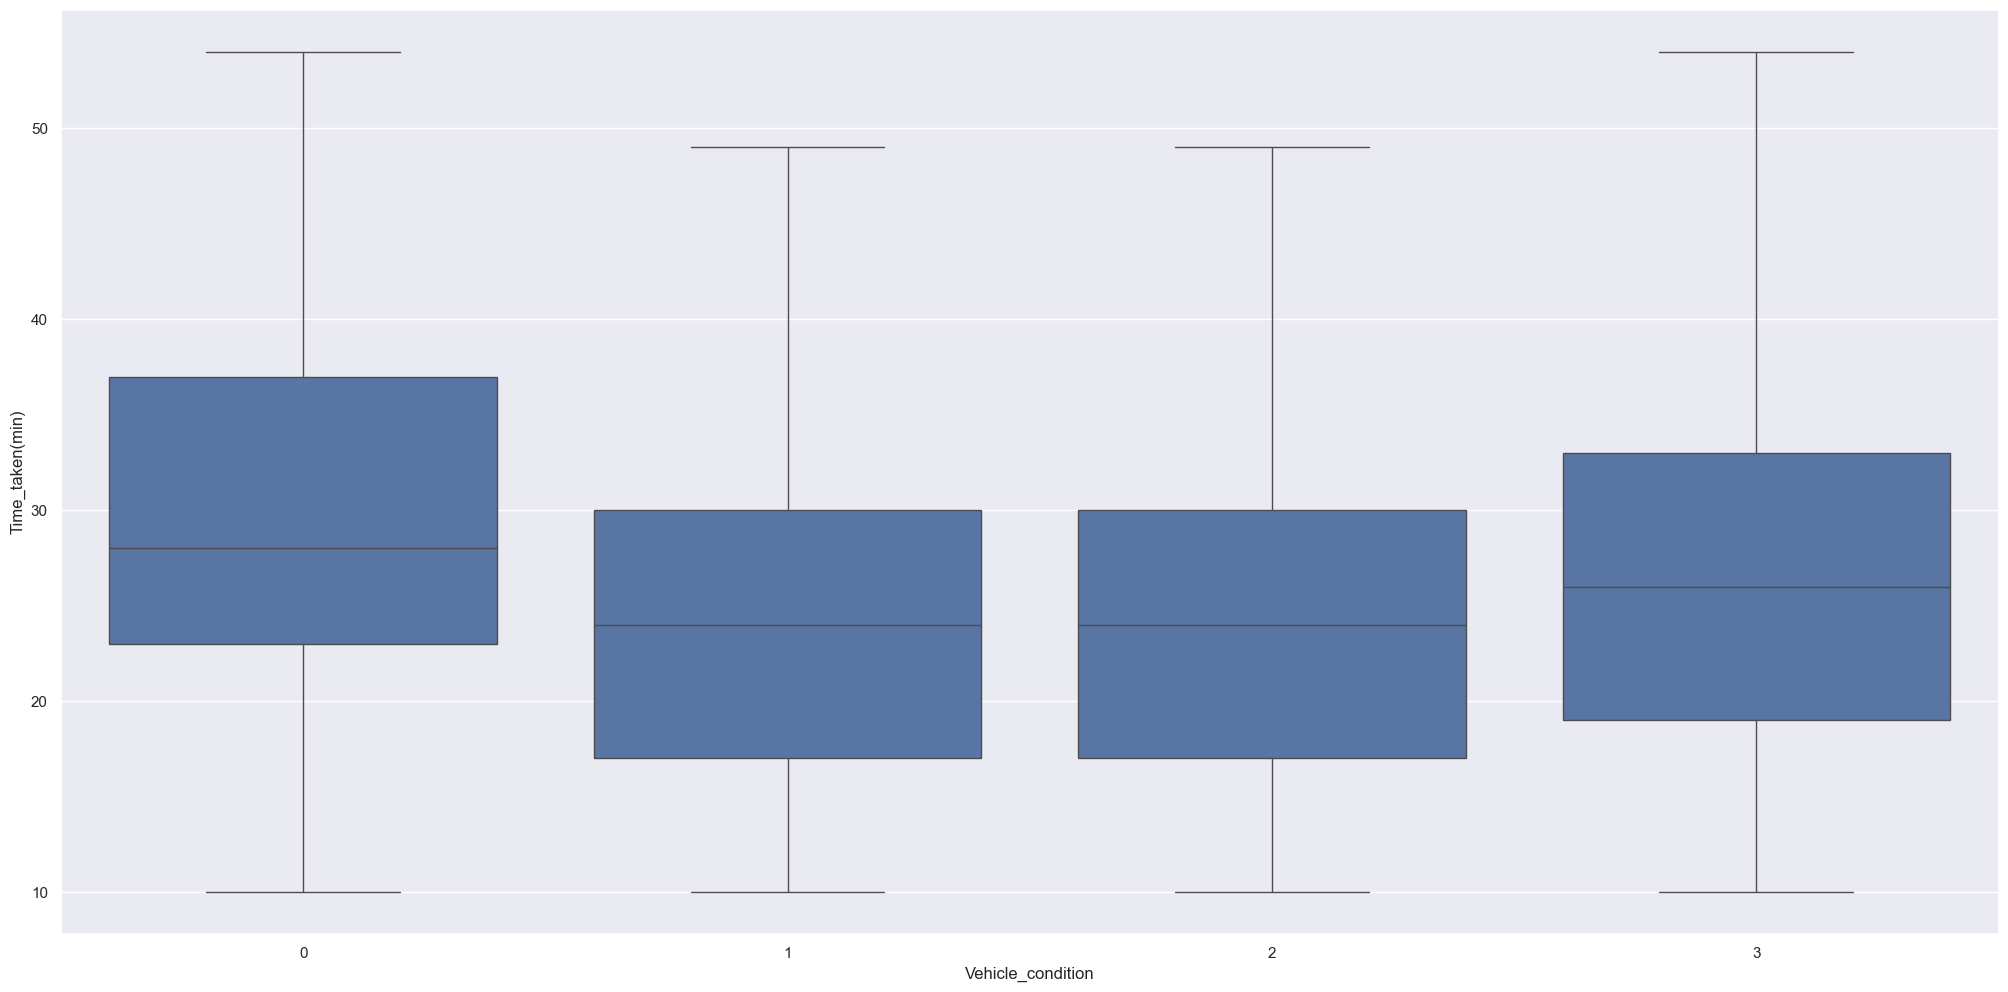

In [ ]:
## A condição do veículo pode influenciar no tempo de Entrega
sns.boxplot(x='Vehicle_condition', y='Time_taken(min)', data=df4)


<Axes: xlabel='Weatherconditions', ylabel='Time_taken(min)'>

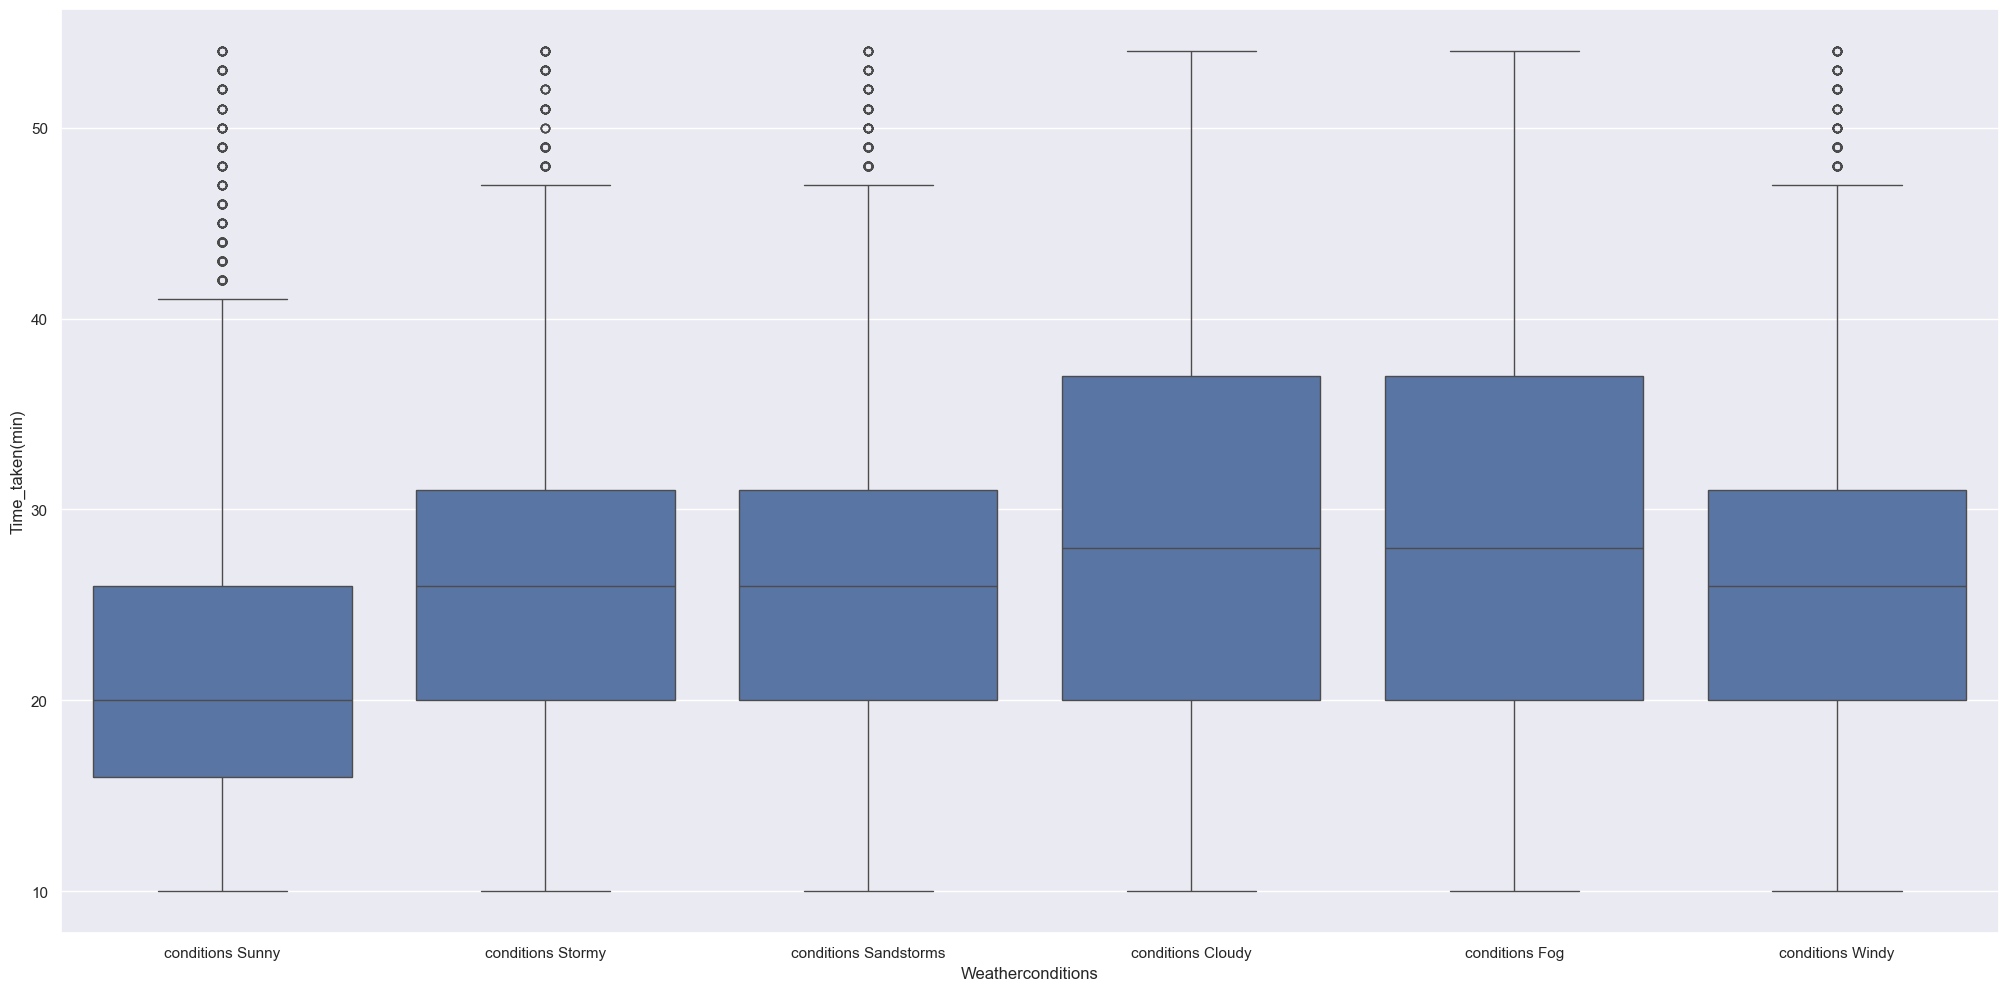

In [ ]:
## Condições climáticas adversas podem aumentar o tempo de entrega
sns.boxplot(x='Weatherconditions', y='Time_taken(min)', data=df4)

<Axes: xlabel='Road_traffic_density', ylabel='Time_taken(min)'>

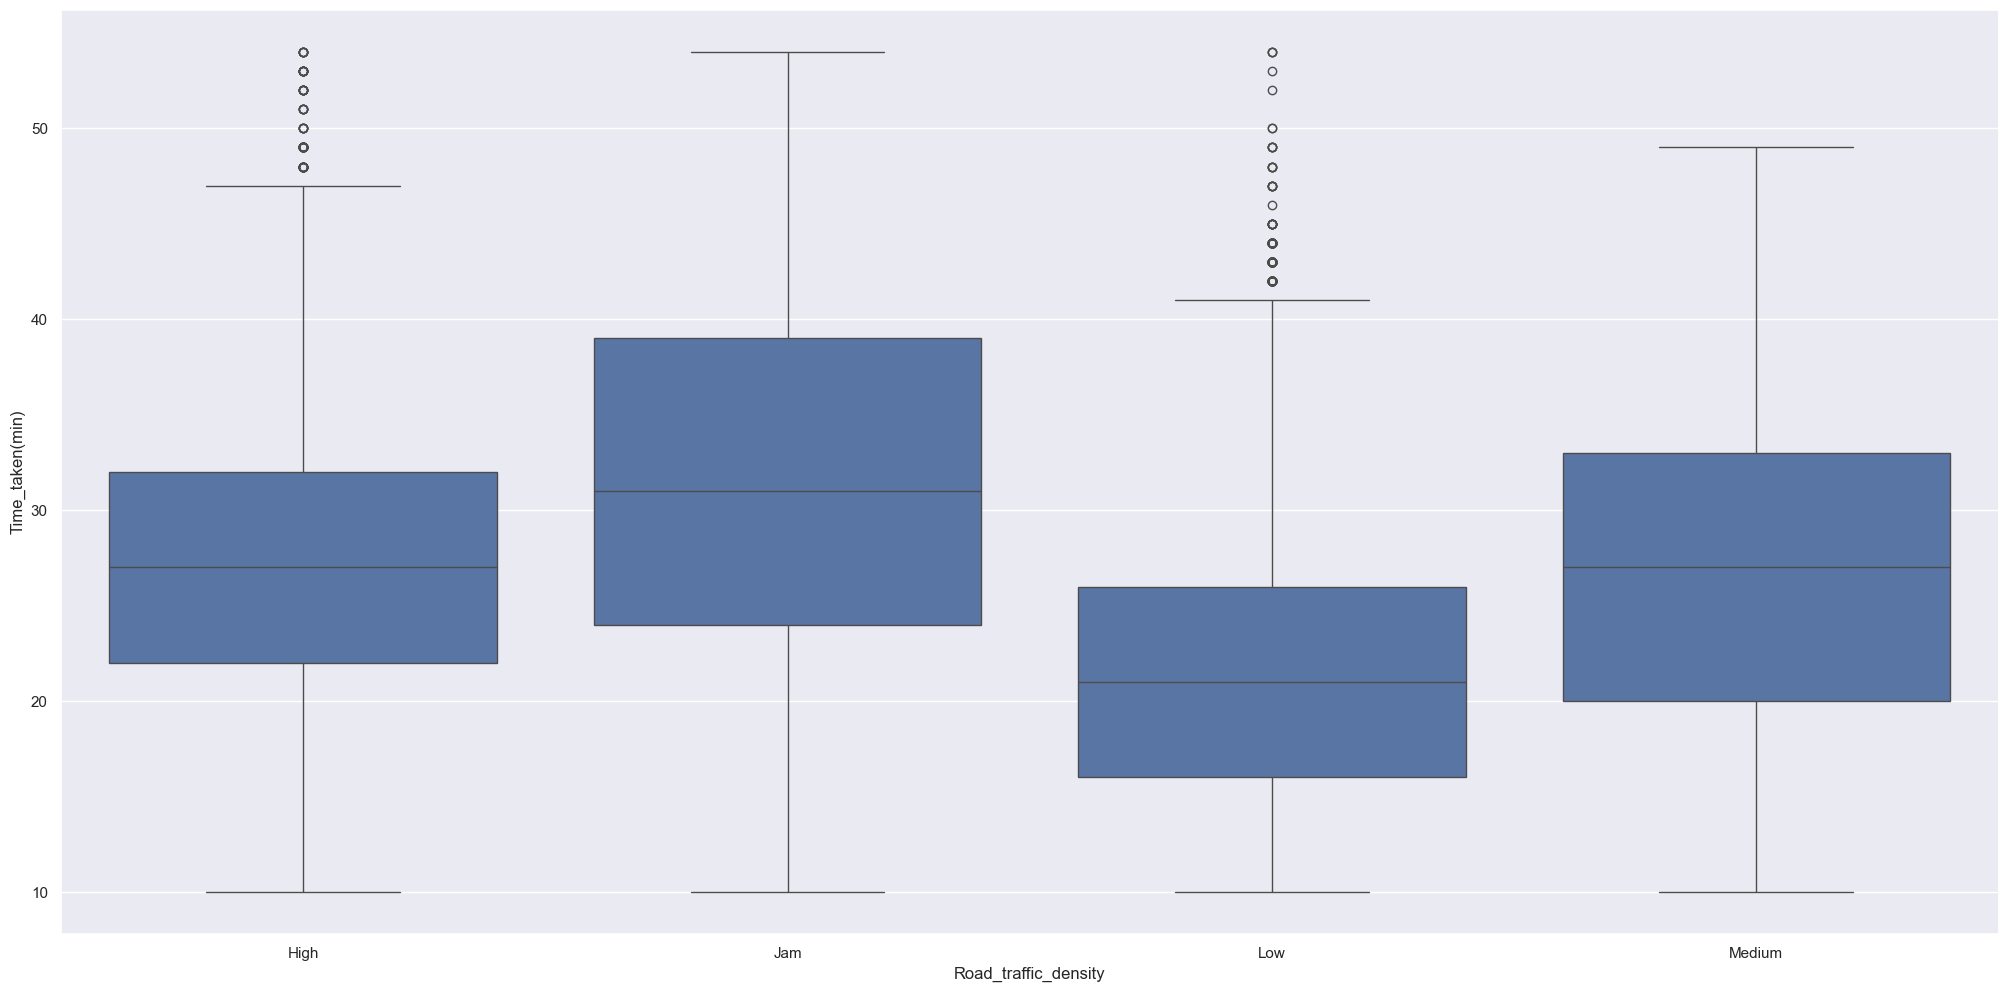

In [ ]:
## Densidade do tráfego pode impactar o tempo de entrega
sns.boxplot(x='Road_traffic_density', y='Time_taken(min)', data=df4)


<Axes: xlabel='Festival', ylabel='Time_taken(min)'>

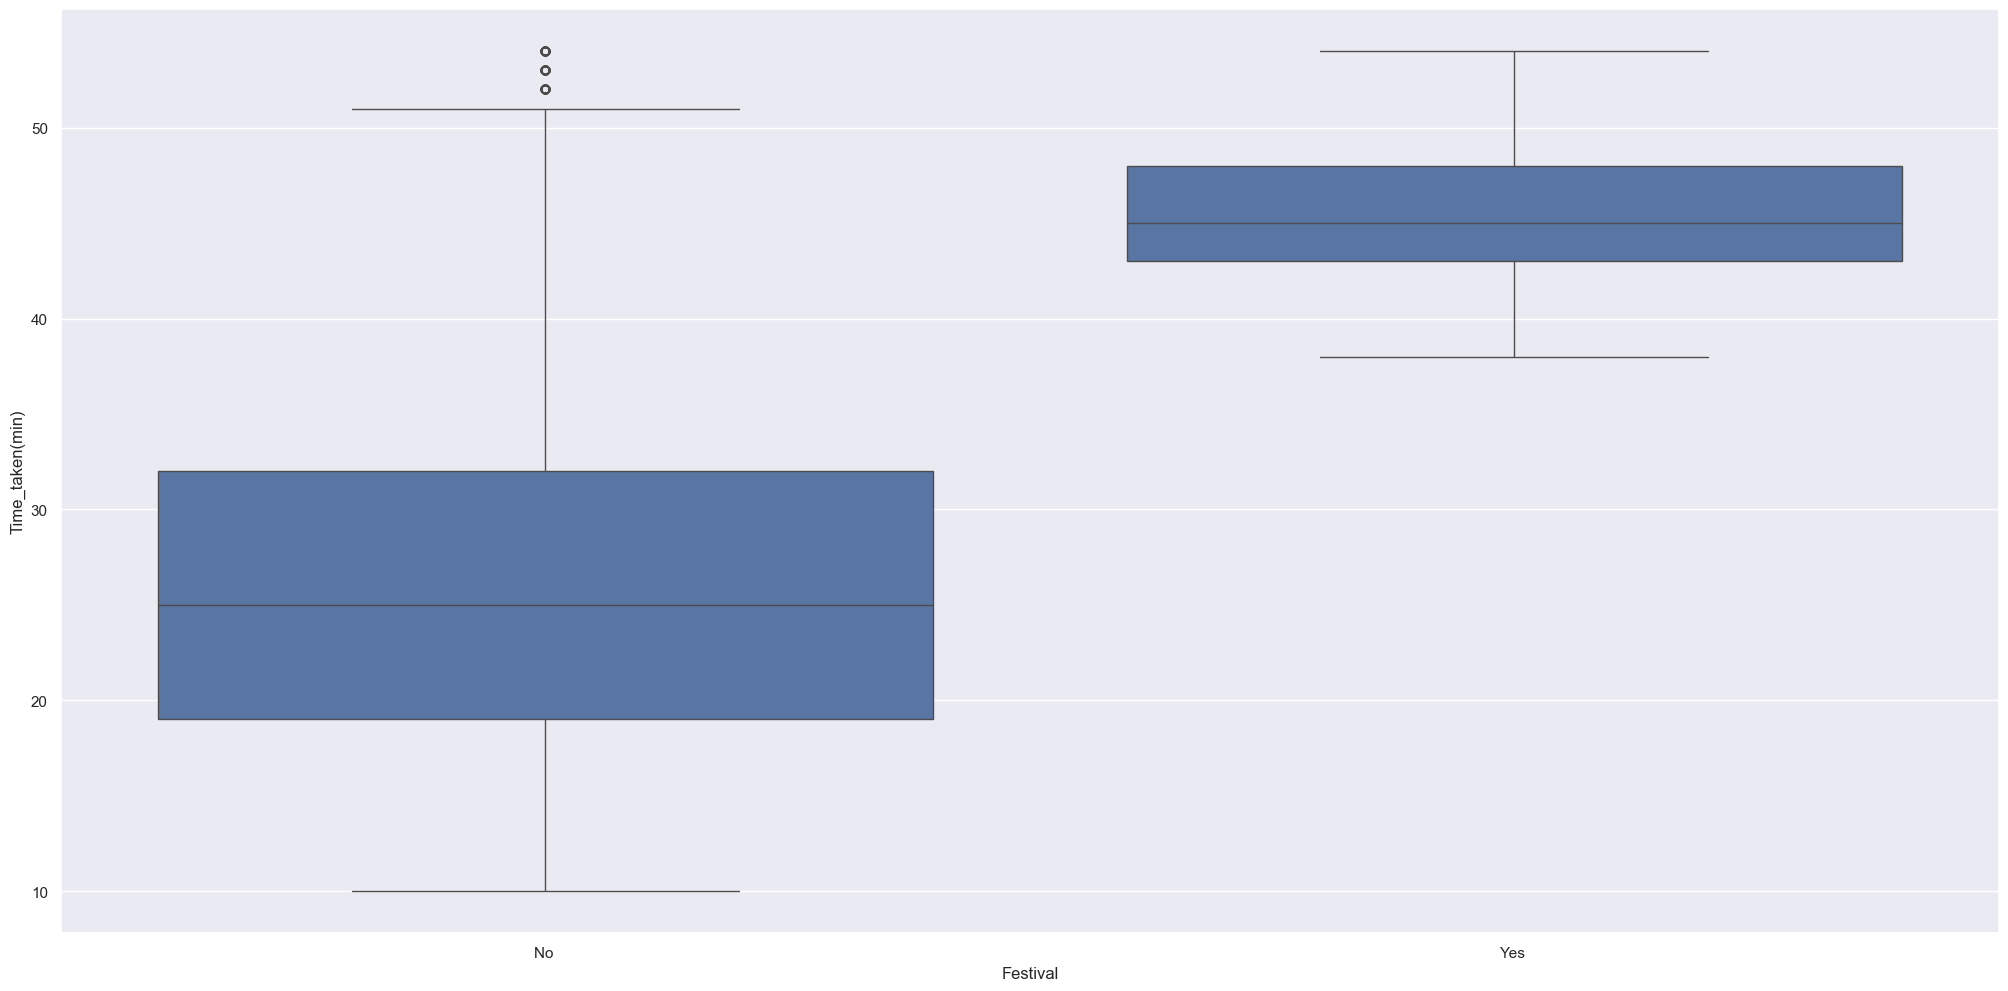

In [ ]:
## Festivais ou eventos na cidade podem afetar o tempo de entrega
sns.boxplot(x='Festival', y='Time_taken(min)', data=df4)

## 4.3 Análise Multi Variada

In [ ]:
num_attributes2 = df4.select_dtypes(include=['int64', 'float64', 'int32'])
num_attributes2 = num_attributes2.drop(columns=['year', 'is_year_start', 'is_year_end'])

<Axes: >

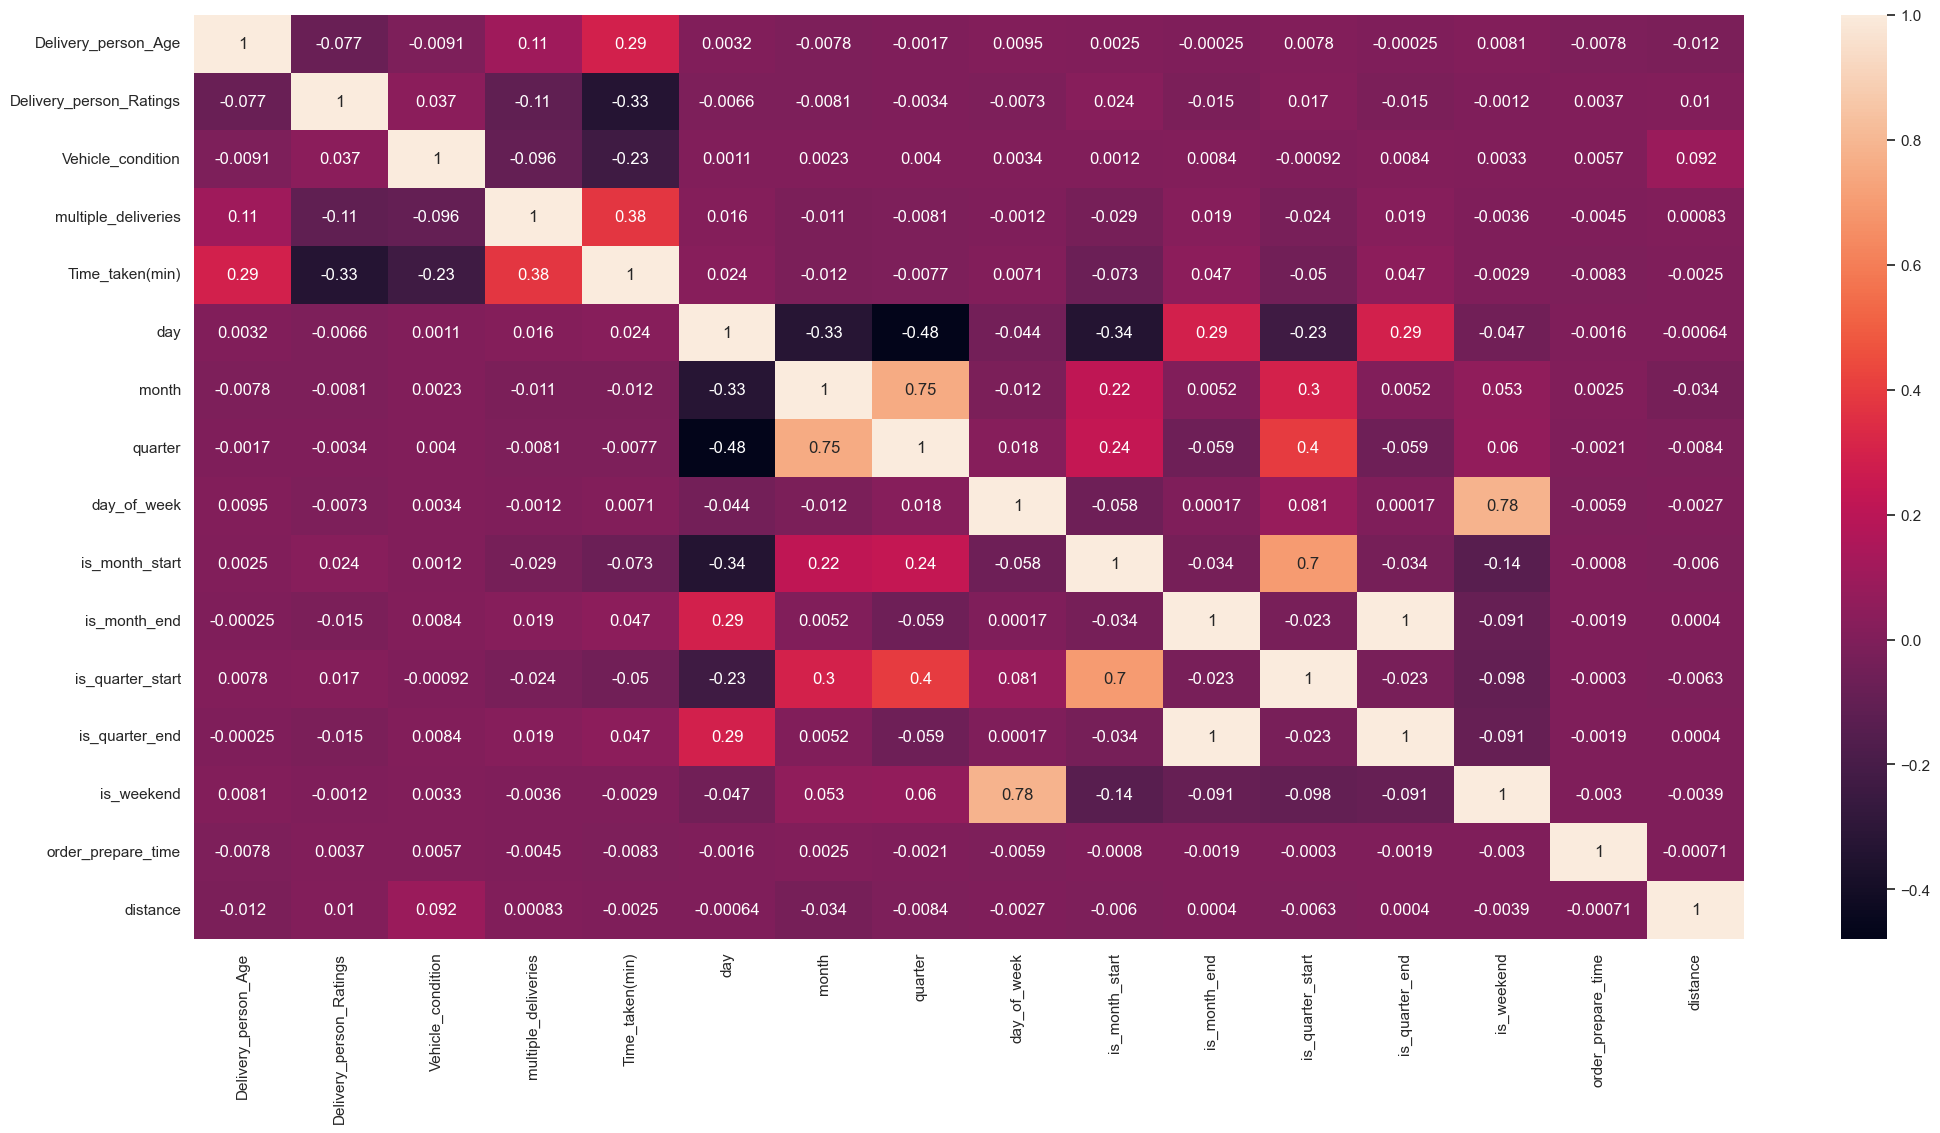

In [ ]:
correlation = num_attributes2.corr(method='pearson')
sns.heatmap(correlation, annot=True)

# 5.0 Modelagem de Dados

In [88]:
def normalizacao(data, column):
    mean_val = data[column].mean()
    std_val = data[column].std()
    data[column] = (data[column] - mean_val) / std_val
    return data

<Axes: xlabel='Delivery_person_Age', ylabel='Count'>

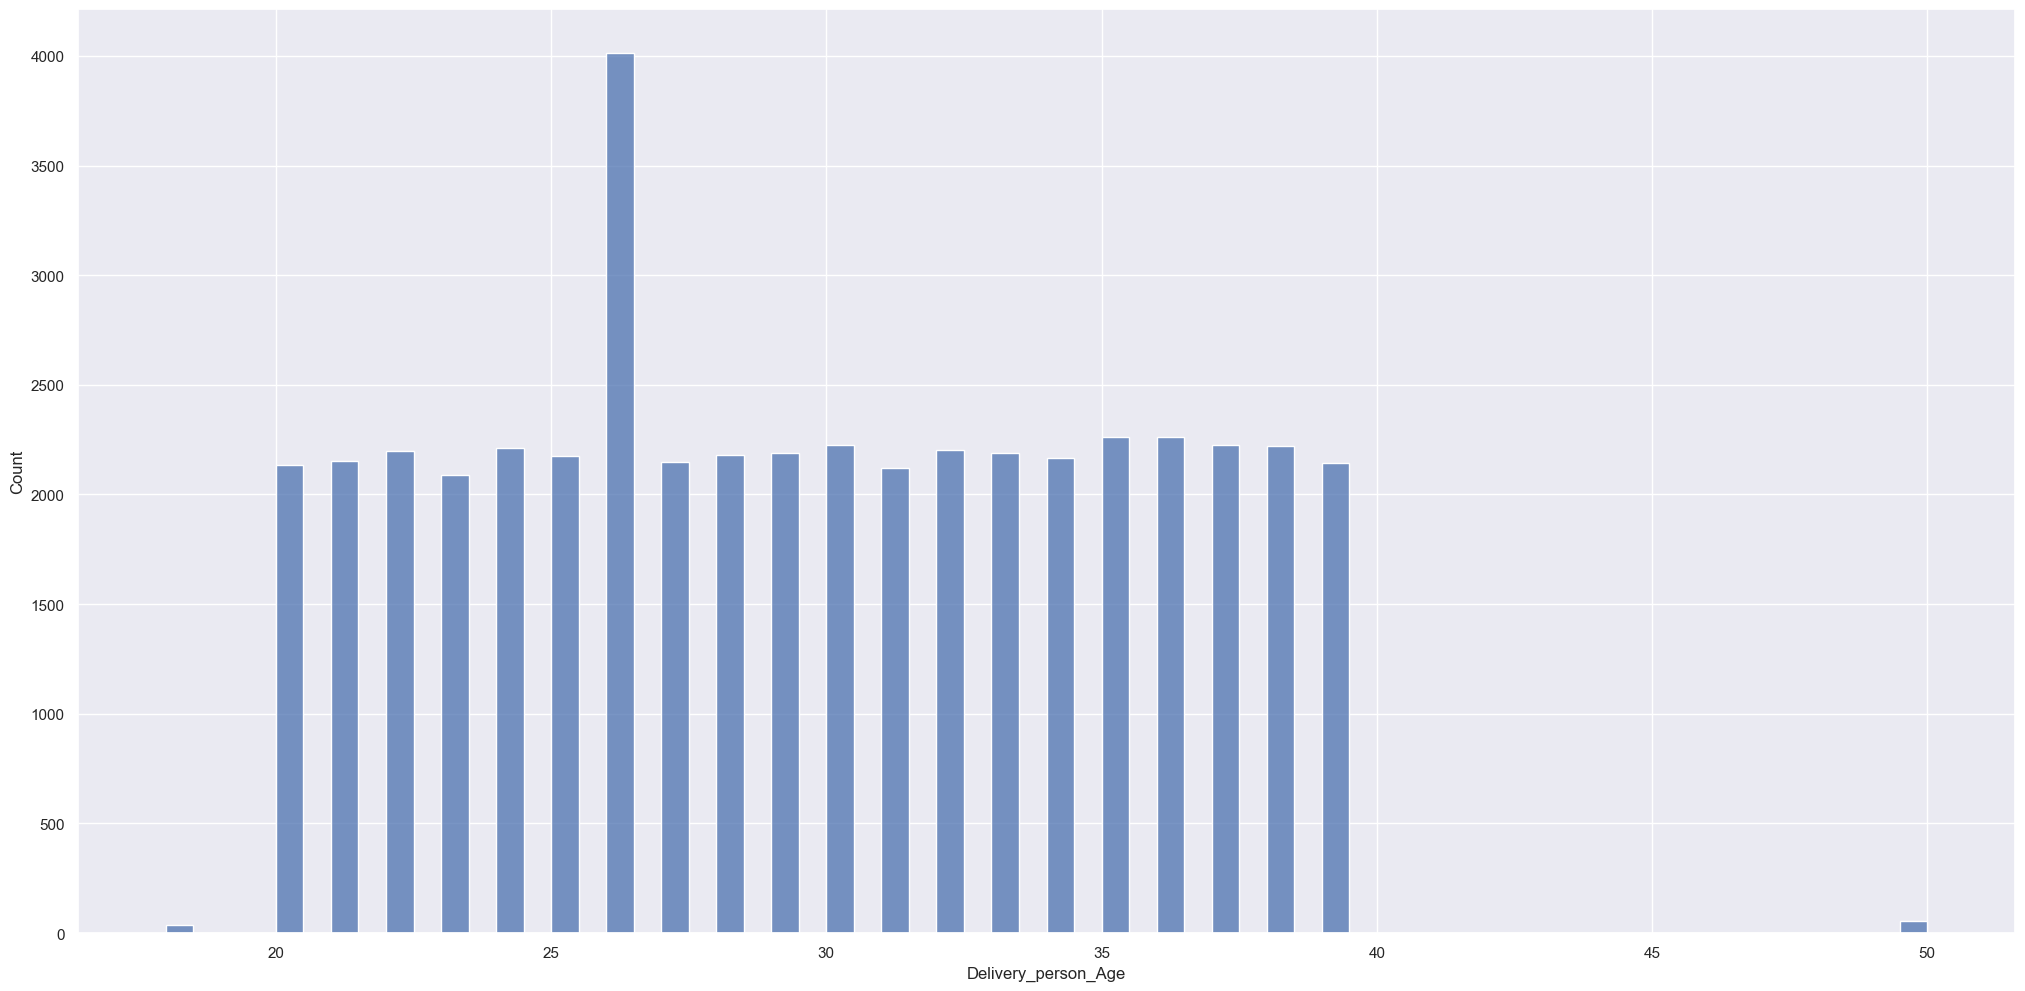

In [89]:
sns.histplot(df4['Delivery_person_Age'])

In [90]:
df_test = normalizacao(df4, 'Delivery_person_Age')

<Axes: xlabel='Delivery_person_Age', ylabel='Count'>

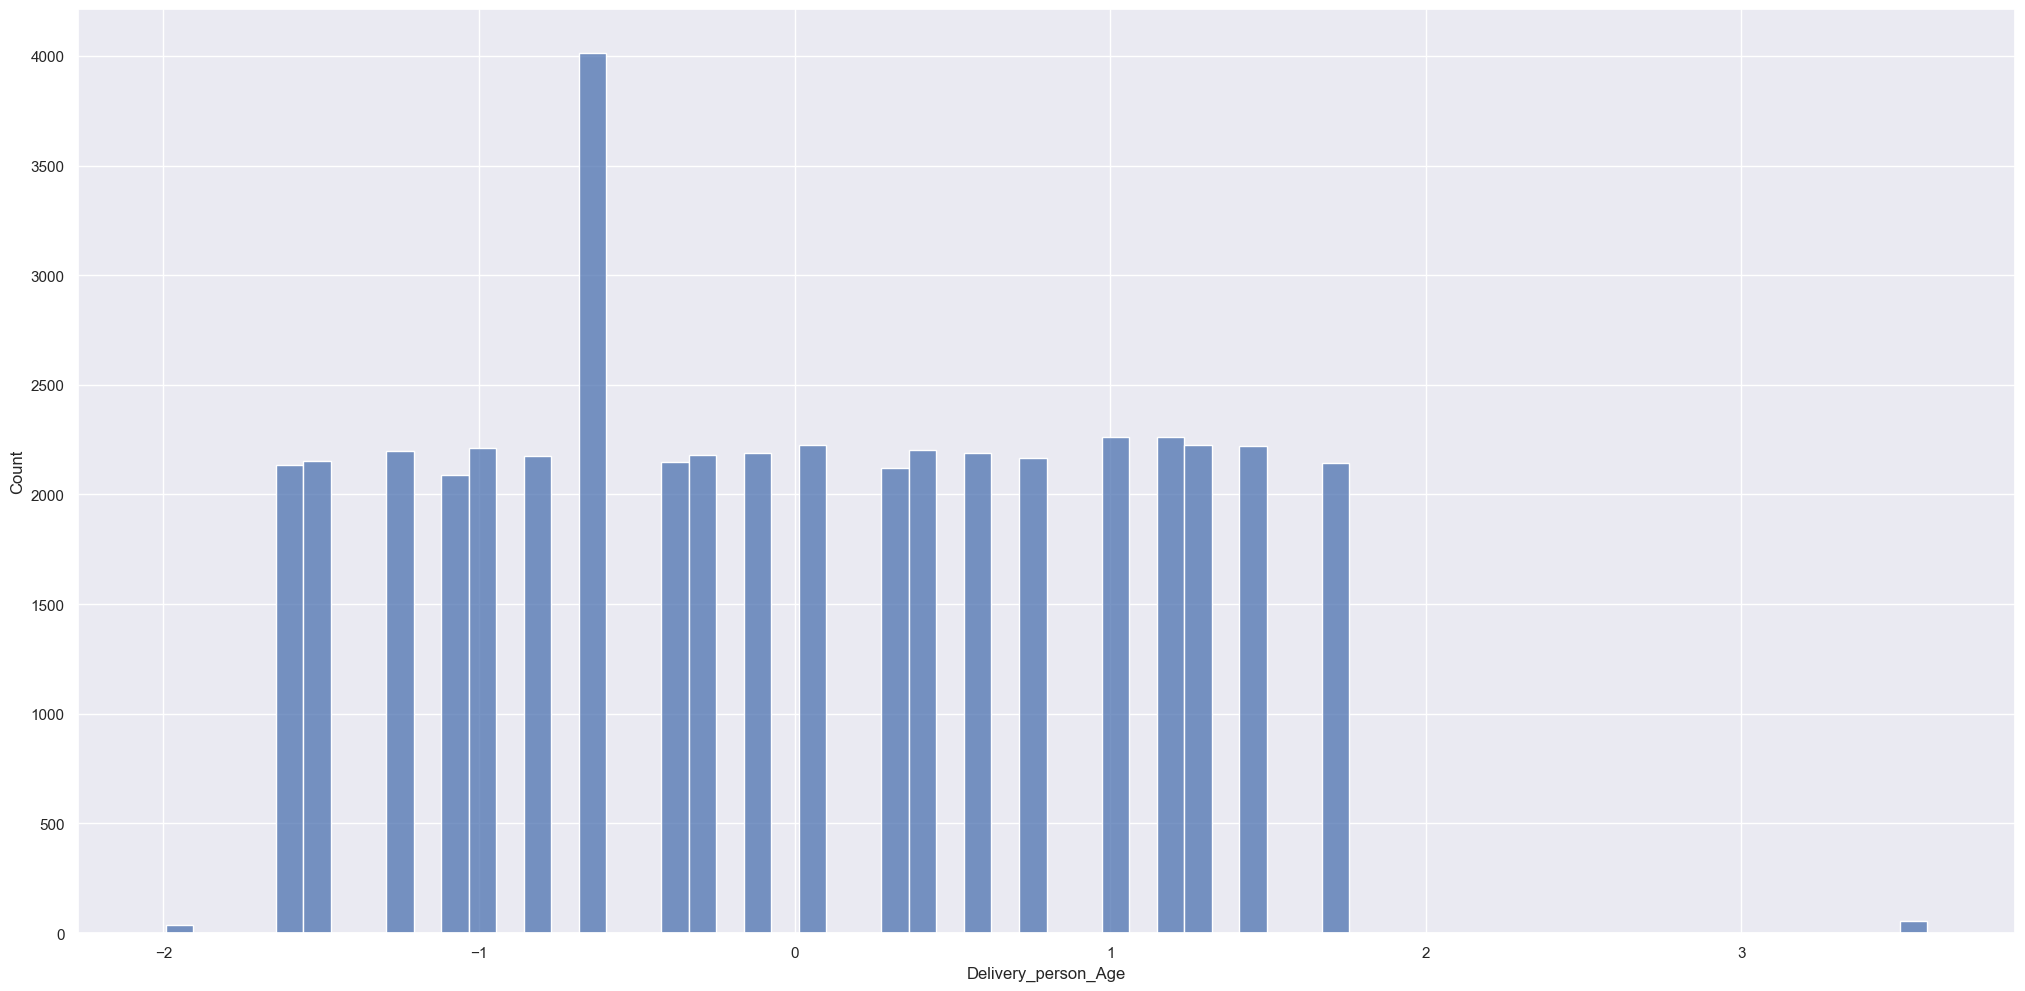

In [91]:
sns.histplot(df_test['Delivery_person_Age'])

In [ ]:
df4.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,INDORES13DEL02,1.321262,4.9,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,-0.244528,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,3
1,BANGRES18DEL02,0.798019,4.5,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,0.714571,25,3,1,2022,4,0,0,0,0,0,0,0,5.0,20
2,BANGRES19DEL01,-1.120540,4.4,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,-0.031395,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,1
3,COIMBRES13DEL02,1.495677,4.7,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,-0.564228,5,4,2,2022,1,0,0,0,0,0,0,0,10.0,7
4,CHENRES12DEL01,0.449190,4.6,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,0.394871,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,6
